Cryptocurrencies are fast becoming rivals to traditional currency across the world. 
The digital currencies are available to purchase in many different places, making it accessible to everyone, and with retailers accepting various cryptocurrencies it could be a sign that money as we know it is about to go through a major change.

In addition, the blockchain technology on which many cryptocurrencies are based, with its revolutionary distributed digital backbone, has many other promising applications. Implementations of secure, decentralized systems can aid us in conquering organizational issues of trust and security that have plagued our society throughout the ages. In effect, we can fundamentally disrupt industries core to economies, businesses and social structures, eliminating inefficiency and human error.

Content The dataset contains all historical daily prices (open, high, low, close) for all cryptocurrencies listed on CoinMarketCap.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [2]:
import statsmodels.api as sm
from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [3]:
df = pd.read_csv("all_currencies.csv")
df.head()

,Unnamed: 0,Date,Symbol,Open,High,Low,Close,Volume,Market Cap
0,0,2015-11-12,$$$,0.000013,0.000017,0.000013,0.000017,142.0,NaN
1,1,2015-11-13,$$$,0.000017,0.000033,0.000016,0.000024,85.0,NaN
2,2,2015-11-14,$$$,0.000024,0.000053,0.000023,0.000030,131.0,NaN
3,3,2015-11-15,$$$,0.000030,0.000063,0.000022,0.000035,132.0,NaN
4,4,2015-11-16,$$$,0.000035,0.000046,0.000032,0.000036,280.0,NaN


In [4]:
df.tail()

,Unnamed: 0,Date,Symbol,Open,High,Low,Close,Volume,Market Cap
645779,189,2018-05-29,ZZC,0.097595,0.101948,0.082738,0.083027,590.0,189967.0
645780,190,2018-05-30,ZZC,0.083082,0.118589,0.056165,0.082957,263.0,161719.0
645781,191,2018-05-31,ZZC,0.082941,0.123240,0.082536,0.121377,52.0,161444.0
645782,192,2018-06-01,ZZC,0.071372,0.102548,0.071372,0.100614,47.0,138924.0
645783,193,2018-06-02,ZZC,0.100570,0.100657,0.059969,0.089404,63.0,195759.0


In [5]:
df.sample()

,Unnamed: 0,Date,Symbol,Open,High,Low,Close,Volume,Market Cap
83706,269,2016-02-22,BTA,0.006274,0.008748,0.005996,0.00686,656.0,25788.0


In [6]:
# Basic Exploration
print("Dataset Shape:", df.shape)

Dataset Shape: (645784, 9)


In [7]:
print("Column Data Types:")
print(df.dtypes)

Column Data Types:
Unnamed: 0      int64
Date           object
Symbol         object
Open          float64
High          float64
Low           float64
Close         float64
Volume        float64
Market Cap    float64
dtype: object


In [8]:
# Drop unnecessary column
df.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
# Missing Values
print("Missing Values")
print(df.isnull().sum())

Missing Values
Date              0
Symbol            0
Open              0
High              0
Low               0
Close             0
Volume         5756
Market Cap    84485
dtype: int64


In [10]:
print("Unique Cryptocurrencies:")
print(df['Symbol'].nunique())

Unique Cryptocurrencies:
877


In [11]:
print("Sample of each crypto:")
df['Symbol'].value_counts()

Sample of each crypto:


Symbol
LTC     1862
BTC     1862
NMC     1862
NVC     1861
PPC     1861
        ... 
KST       35
VIPS      33
TTT       31
BCI       31
PLAN      30
Name: count, Length: 877, dtype: int64

In [12]:
# Check for duplicates
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


In [13]:
# Statistical summary
print("Statistical Summary:")
df.describe().T

Statistical Summary:


,count,mean,std,min,25%,50%,75%,max
Open,645784.0,1.838564e+02,8.697238e+03,2.500000e-09,0.000495,0.006627,7.903150e-02,2.298390e+06
High,645784.0,2.230398e+02,1.142367e+04,3.200000e-09,0.000581,0.007638,9.116875e-02,2.926100e+06
Low,645784.0,1.467489e+02,6.328668e+03,2.300000e-09,0.000430,0.005809,6.937925e-02,2.030590e+06
Close,645784.0,1.821590e+02,8.585699e+03,2.500000e-09,0.000496,0.006635,7.906125e-02,2.300740e+06
Volume,640028.0,7.048649e+06,1.929721e+08,0.000000e+00,29.000000,403.000000,7.803250e+03,2.384090e+10
Market Cap,561299.0,1.990142e+08,4.089282e+09,0.000000e+00,24589.500000,161452.000000,1.452460e+06,3.261410e+11


In [14]:
# basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645784 entries, 0 to 645783
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Date        645784 non-null  object 
 1   Symbol      645784 non-null  object 
 2   Open        645784 non-null  float64
 3   High        645784 non-null  float64
 4   Low         645784 non-null  float64
 5   Close       645784 non-null  float64
 6   Volume      640028 non-null  float64
 7   Market Cap  561299 non-null  float64
dtypes: float64(6), object(2)
memory usage: 39.4+ MB


## Filtering only the BTC Data

In [15]:
# Filter only BTC data
df_btc = df[df['Symbol'] == 'BTC'].copy()
df_btc = df_btc.reset_index(drop=True)

In [16]:
df_btc = df_btc.drop(['Market Cap', 'Volume'], axis=1)
df_btc = df_btc.reset_index(drop=True)

In [17]:
df_btc.head()

,Date,Symbol,Open,High,Low,Close
0,2013-04-28,BTC,135.30,135.98,132.10,134.21
1,2013-04-29,BTC,134.44,147.49,134.00,144.54
2,2013-04-30,BTC,144.00,146.93,134.05,139.00
3,2013-05-01,BTC,139.00,139.89,107.72,116.99
4,2013-05-02,BTC,116.38,125.60,92.28,105.21


In [18]:
df_btc.tail()

,Date,Symbol,Open,High,Low,Close
1857,2018-05-29,BTC,7129.46,7526.42,7090.68,7472.59
1858,2018-05-30,BTC,7469.73,7573.77,7313.60,7406.52
1859,2018-05-31,BTC,7406.15,7608.90,7361.13,7494.17
1860,2018-06-01,BTC,7500.70,7604.73,7407.34,7541.45
1861,2018-06-02,BTC,7536.72,7695.83,7497.26,7643.45


In [19]:
df_btc.sample()

,Date,Symbol,Open,High,Low,Close
222,2013-12-06,BTC,1042.38,1042.38,829.45,829.45


In [20]:
df_btc.describe()

,Open,High,Low,Close
count,1862.000000,1862.000000,1862.000000,1862.000000
mean,1873.425215,1939.293974,1800.072691,1877.180569
std,3314.255163,3452.230665,3145.814136,3316.299695
min,68.500000,74.560000,65.530000,68.430000
25%,284.730000,290.825000,280.642500,285.240000
50%,562.535000,575.140000,532.625000,563.155000
75%,1049.080000,1080.110000,1027.457500,1048.822500
max,19475.800000,20089.000000,18974.100000,19497.400000


In [21]:
df_btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1862 entries, 0 to 1861
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1862 non-null   object 
 1   Symbol  1862 non-null   object 
 2   Open    1862 non-null   float64
 3   High    1862 non-null   float64
 4   Low     1862 non-null   float64
 5   Close   1862 non-null   float64
dtypes: float64(4), object(2)
memory usage: 87.4+ KB


In [22]:
print('BTC Dataset Shape')
df_btc.shape

BTC Dataset Shape


(1862, 6)

In [23]:
print(f"\nMissing Values:")
df_btc.isnull().sum()


Missing Values:


Date      0
Symbol    0
Open      0
High      0
Low       0
Close     0
dtype: int64

In [24]:
# Check for duplicates
df_btc.duplicated().sum()

0

In [25]:
# Converts the Date column from object type to datetime format
df_btc.Date = pd.to_datetime(df_btc['Date'])

In [26]:
df_btc.Date.min(), df_btc.Date.max()

(Timestamp('2013-04-28 00:00:00'), Timestamp('2018-06-02 00:00:00'))

In [27]:
df_btc.Date.max()-df_btc.Date.min()

Timedelta('1861 days 00:00:00')

In [28]:
df_btc.set_index('Date', inplace=True)

## Visualization 

<Figure size 1500x600 with 0 Axes>

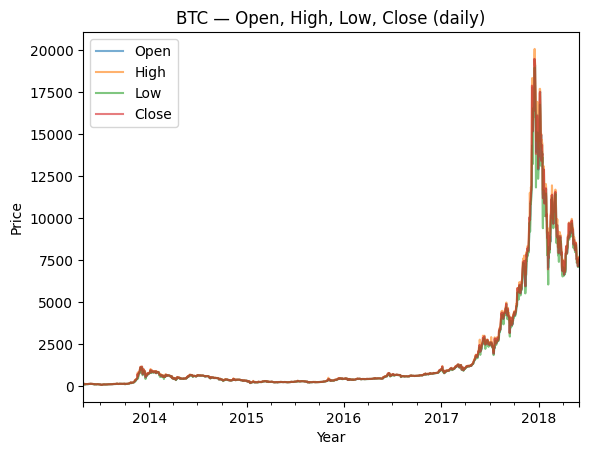

In [29]:
# Plot OHLC on one chart (transparent lines)
plt.figure(figsize=(15,6))
df_btc[['Open','High','Low','Close']].plot(alpha=0.6)
plt.title('BTC — Open, High, Low, Close (daily)')
plt.ylabel('Price')
plt.xlabel('Year')
plt.legend()
plt.show()

### Rolling mean & rolling std (30-day) to inspect non-stationarity/volatility

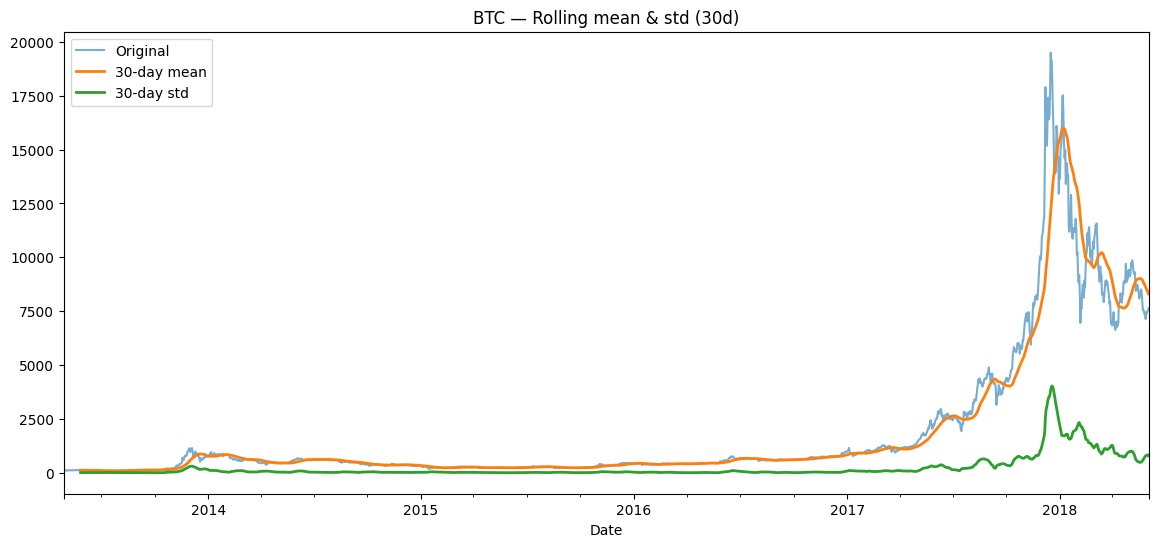

In [30]:
y = df_btc['Close'].dropna()
rol_mean = y.rolling(window=30).mean()
rol_std = y.rolling(window=30).std()

plt.figure(figsize=(14,6))
y.plot(label='Original', alpha=0.6)
rol_mean.plot(label='30-day mean', linewidth=2)
rol_std.plot(label='30-day std', linewidth=2)
plt.title('BTC — Rolling mean & std (30d)')
plt.legend()
plt.show()


Key Insights

BTC was relatively stable until 2016.
Huge price surge and volatility in 2017 (bubble-like behavior).
Post-2018, prices dropped but volatility persisted for a while.
Rolling mean and std are useful for detecting trends and risk.

### Boxplot by year and by month (seasonality / yearly distribution)

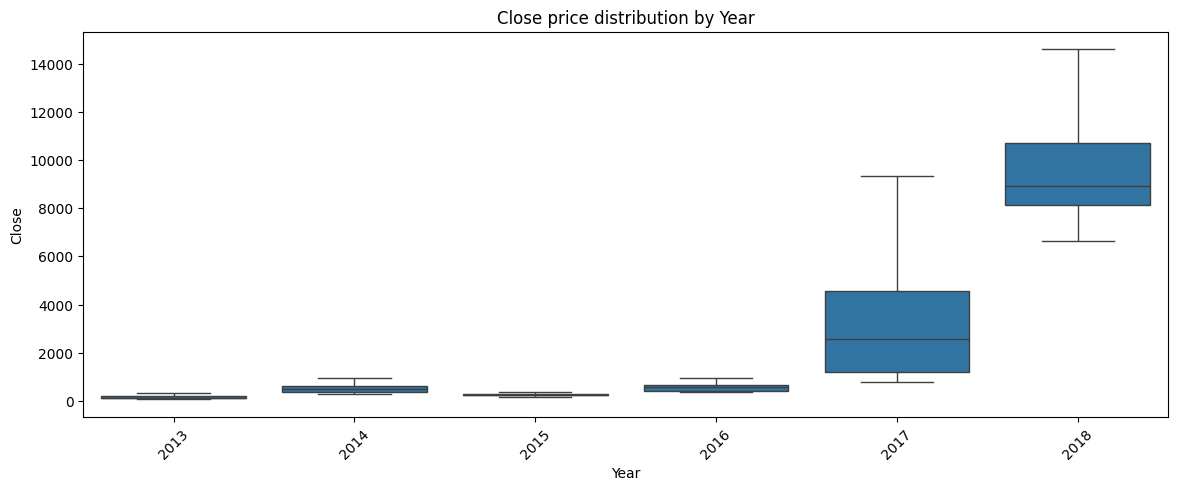

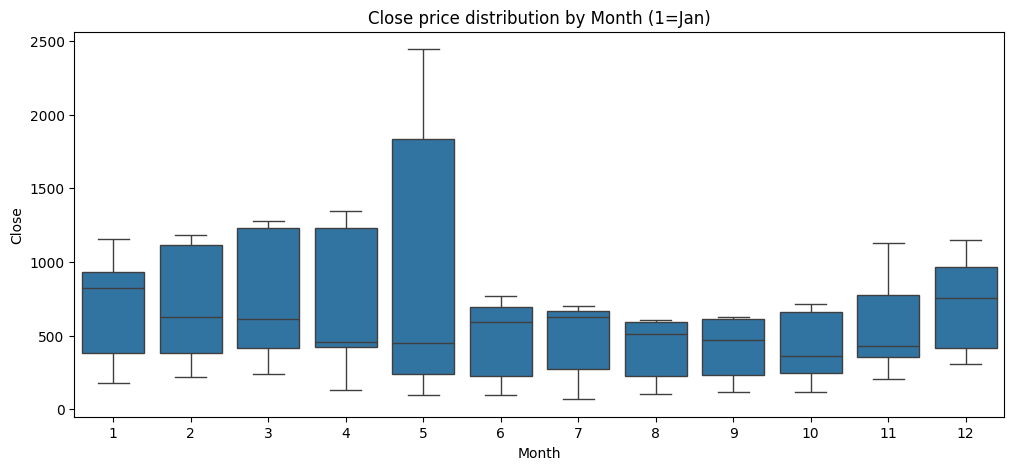

In [31]:
# Ensure we have Year & Month columns for grouping
df_btc['Year'] = df_btc.index.year
df_btc['Month'] = df_btc.index.month

plt.figure(figsize=(14,5))
sns.boxplot(x='Year', y='Close', data=df_btc.reset_index(), showfliers=False)  # showfliers=False to remove outliers
plt.title('Close price distribution by Year')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12,5))
sns.boxplot(x='Month', y='Close', data=df_btc.reset_index(), showfliers=False)  # showfliers=False to remove outliers
plt.title('Close price distribution by Month (1=Jan)')
plt.show()


Before checking for stationarity:
I want to visually understand the time series structure.
The seasonal decomposition helps us separate:
Trend → long-term movement
Seasonality → repeating short-term pattern
Residual → stationary component (the noise)

### Seasonal Decomposition and Stationary Check

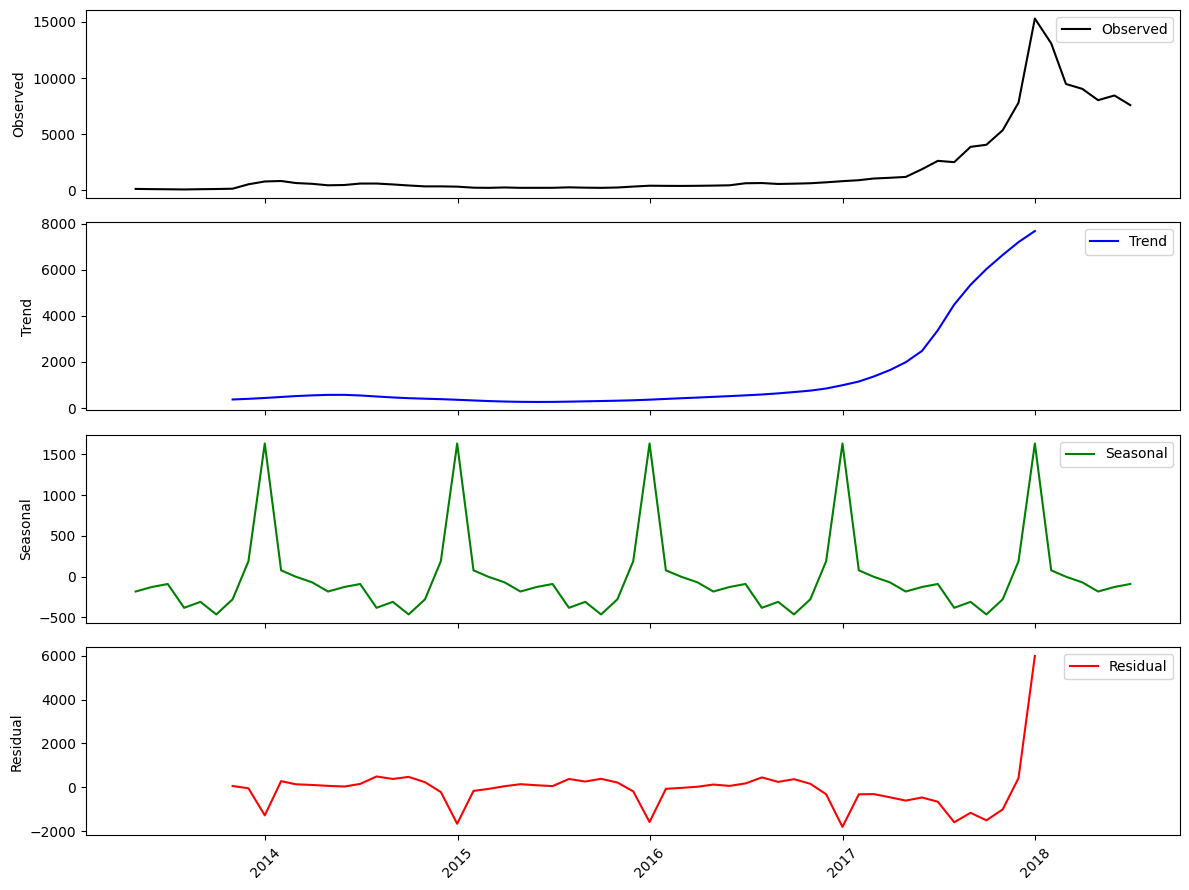

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose

# 1. Ensure data is sorted by Date
df_btc = df_btc.sort_index()

# 2. Resample to monthly frequency (you can also try weekly = 'W')
monthly_close = df_btc['Close'].resample('M').mean().dropna()


# 3. Perform seasonal decomposition (period=12 → yearly seasonality for monthly data)
result = seasonal_decompose(monthly_close, model='additive', period=12)

# 4. Plot the components manually
fig, axes = plt.subplots(4, 1, figsize=(12, 9), sharex=True)

# Observed
axes[0].plot(monthly_close, label='Observed', color='black')
axes[0].set_ylabel('Observed')
axes[0].legend()

# Trend
axes[1].plot(result.trend, label='Trend', color='blue')
axes[1].set_ylabel('Trend')
axes[1].legend()

# Seasonal
axes[2].plot(result.seasonal, label='Seasonal', color='green')
axes[2].set_ylabel('Seasonal')
axes[2].legend()

# Residual
axes[3].plot(result.resid, label='Residual', color='red')
axes[3].set_ylabel('Residual')
axes[3].legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Observed (Top Panel)

This is the original time series data.
It starts relatively flat from 2013 to around 2016, then shows a sharp increase in 2017, peaking in early 2018, followed by a decline.
This suggests a major upward shift in the underlying phenomenon during the later period.

Trend (Second Panel)

The trend line is mostly flat until around 2016, then begins to rise sharply from 2017 onward.
This indicates a long-term growth pattern, likely driven by structural changes or external factors.

Seasonal (Third Panel)

The seasonal component shows repeating spikes at regular intervals (roughly yearly).
These spikes suggest strong seasonality, possibly linked to annual events or cycles.

Residual (Bottom Panel)

Residuals are relatively stable until late 2017, then show large positive deviations in early 2018.
This means that the model could not fully explain the sudden surge, indicating an anomaly or unexpected event.

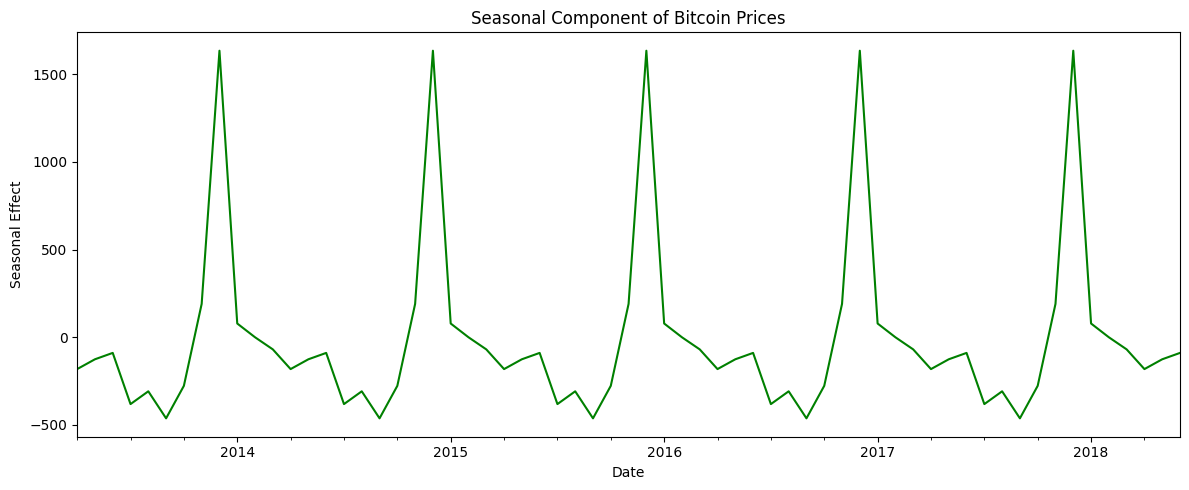

In [33]:
# Plot only the seasonal component
result.seasonal.plot(title='Seasonal Component of Bitcoin Prices', figsize=(12,5), color='green')
plt.xlabel('Date')
plt.ylabel('Seasonal Effect')
plt.tight_layout()
plt.show()


Bitcoin prices are not purely random; they exhibit predictable seasonal fluctuations.

The sharpness of peaks suggests that certain months or periods are highly influential—possibly linked to investor behavior or global events.

# Autocorrelation visuals (ACF & PACF) for raw Close (it will help me understand serial correlation before differencing)

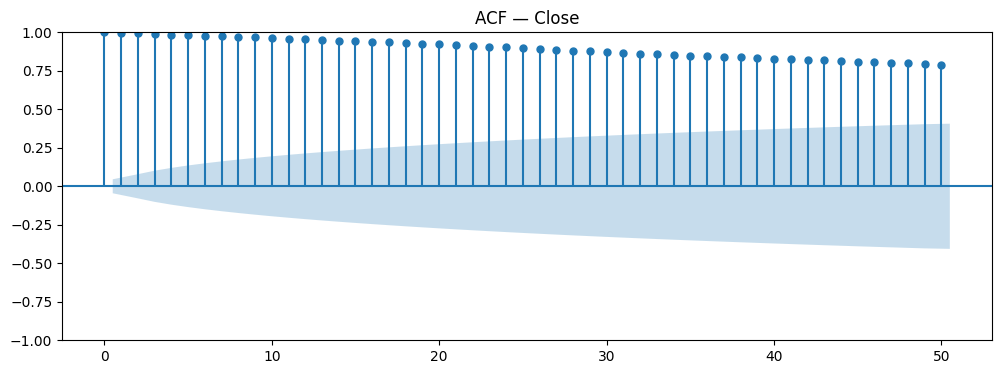

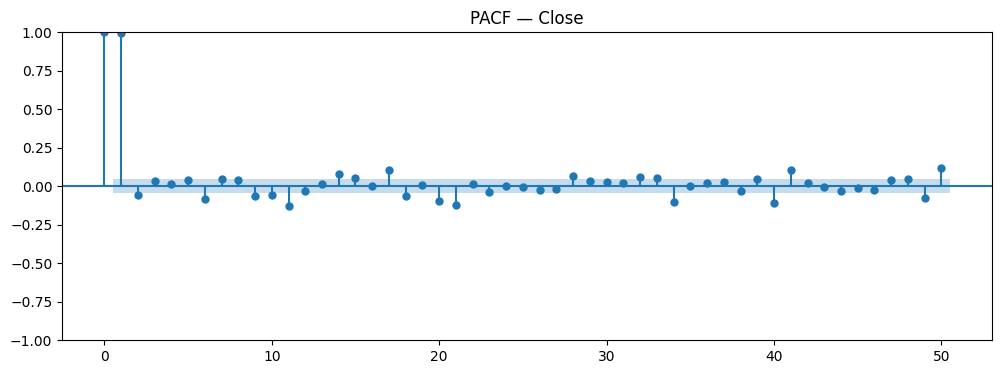

In [34]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12,4))
plot_acf(df_btc['Close'].dropna(), lags=50, ax=plt.gca())
plt.title('ACF — Close')
plt.show()

plt.figure(figsize=(12,4))
plot_pacf(df_btc['Close'].dropna(), lags=50, ax=plt.gca(), method='ywm')
plt.title('PACF — Close')
plt.show()


### ACF (first chart) - In my chart, the bars stay very high for many lags → today’s price is strongly linked to past prices for a long time.
### This means the series is not stationary (it has a trend).

### PACF (second chart)

### Here, the first bar is very tall, the second is smaller, and then almost flat →
### Only the last 1–2 days matter most after differencing.

### Perform the Augmented Dickey-Fuller (ADF) Test
### To check if the time series is stationary or not

In [35]:
from statsmodels.tsa.stattools import adfuller

# Use the same monthly data we decomposed
y = df_btc['Close'].resample('M').mean().dropna()

# Perform ADF Test
result_adf = adfuller(y)

print('ADF Statistics: %f' %result_adf[0])
print('p-value: %f' %result_adf[1])
print('Critical Values:')
for key, value in result_adf[4].items():
    print(f'   {key}: {value:.3f}')

# Quick interpretation
if result_adf[1] < 0.05:
    print("\n The series is stationary (reject H0).")
else:
    print("\n The series is NOT stationary (fail to reject H0).")

ADF Statistics: -0.156922
p-value: 0.943465
Critical Values:
   1%: -3.563
   5%: -2.919
   10%: -2.597

 The series is NOT stationary (fail to reject H0).


------------------------------------------------------------------------------------------------------------------
🔹 1. ADF Statistic = -0.1569

This is my test statistic.
It’s compared against the critical values at 1%, 5%, and 10% significance levels.

If my ADF statistic is less than (i.e., more negative than) the critical value → reject H₀ → stationary.

If my ADF statistic is greater than the critical value → fail to reject H₀ → non-stationary.

Here:
-0.1569 > -2.919 (5% level) → fail to reject H₀ → non-stationary.

🔹 2. p-value = 0.943

This is the probability of observing the data if the series were stationary.

A high p-value (like 0.94) means there’s strong evidence for non-stationarity.

It’s almost certain my series has a trend or seasonality.

🔹 3. Critical Values

These are reference thresholds:

Significance level	Critical value	Interpretation
1%	-3.563	Very strict threshold
5%	-2.919	Standard confidence
10%	-2.597	Lenient threshold

Your ADF statistic (-0.1569) is greater than all of them, so at any confidence level (1%, 5%, 10%), the test says its not stationary.

# Since it is not Stationary

## I am Apply First-Order Differencing

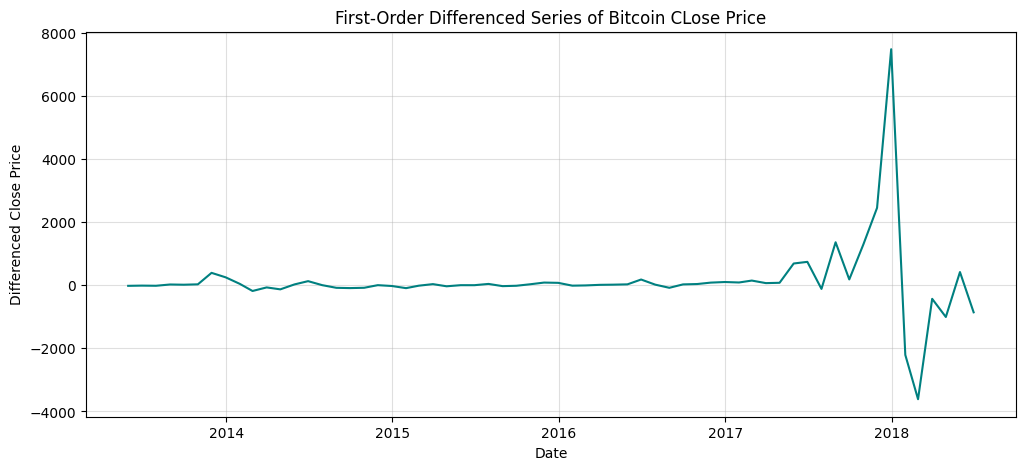

In [36]:
# First-order differencing
y_diff1 = y.diff().dropna()

# Plot the differenced series
plt.figure(figsize=(12,5))
plt.plot(y_diff1, color='teal')
plt.title('First-Order Differenced Series of Bitcoin CLose Price')
plt.xlabel('Date')
plt.ylabel('Differenced Close Price')       
plt.grid(True, alpha=0.4)
plt.show()

From the first-order differenced series, we can see:

The trend component is mostly removed (the line now fluctuates around zero).

However, there are still large spikes around 2017–2018, meaning the variance might not be stable yet — that’s a clue the series may still not be fully stationary.

## Check Stationarity Again (ADF Test)

In [37]:
from statsmodels.tsa.stattools import adfuller

result_adf_diff1 = adfuller(y_diff1)
print('ADF Statistic (1st Difference):', result_adf_diff1[0])
print('p-value:', result_adf_diff1[1])
print('Critical Values:')
for key, value in result_adf_diff1[4].items():
    print(f'   {key}: {value:.3f}')

if result_adf_diff1[1] < 0.05:
    print("\n The differenced series is stationary (reject H0).")
else:
    print("\n Still not stationary. Consider 2nd differencing or log transformation.")


ADF Statistic (1st Difference): -2.397604787587296
p-value: 0.14241358124207792
Critical Values:
   1%: -3.563
   5%: -2.919
   10%: -2.597

 Still not stationary. Consider 2nd differencing or log transformation.


---------------------------------------------------------------------------------------------------------------------------------
My ADF Statistic (-2.39) is still greater (less negative) than the 5% critical value (-2.919).

The p-value (0.142) is > 0.05, so we still fail to reject the null hypothesis.
→ Therefore, even after 1st differencing, your series is not yet stationary.


Start with log + 1st difference, because Bitcoin’s prices usually have multiplicative trends.

If that’s still not stationary, we’ll do 2nd differencing next.

## (second differencing) can make the model over-differenced — it might become too stationary, removing useful information about structure and hurting predictive accuracy.

### Financial data (like crypto prices) almost always grows exponentially — variance increases as the price rises.

### A log transform stabilizes variance and converts multiplicative relationships into additive ones — making patterns easier for ARIMA/SARIMA models to capture.

### First differencing after the log removes the remaining linear trend, leaving you with a series whose mean and variance are both roughly constant (a requirement for stationarity).

### It’s statistically cleaner and easier to interpret: differences in log values ≈ percentage change in price.

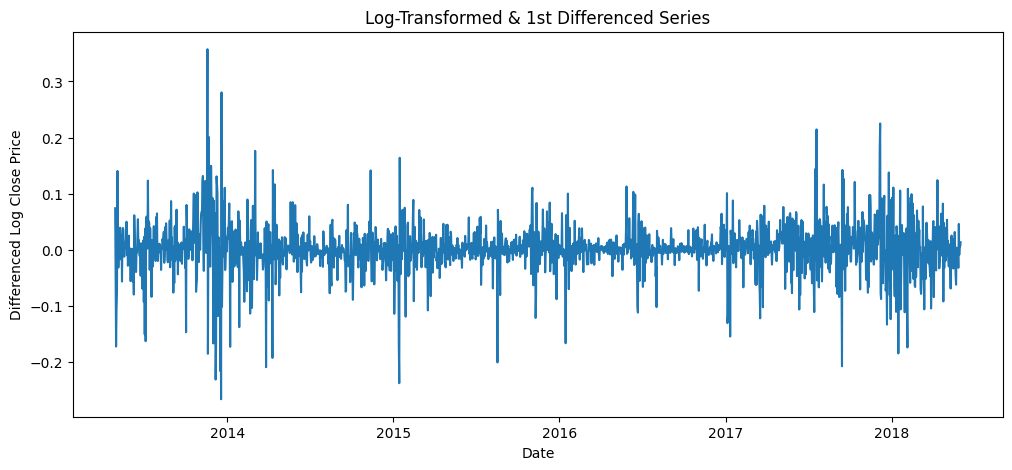

In [38]:
# Applying log trannsformation
btc_log = np.log(df_btc['Close'])

# 1st differencing of logged data
btc_log_diff1 = btc_log.diff().dropna()

# Plot
plt.figure(figsize=(12, 5))
plt.plot(btc_log_diff1)
plt.title('Log-Transformed & 1st Differenced Series')
plt.xlabel('Date')
plt.ylabel('Differenced Log Close Price')
plt.show()

Mean is roughly constant → The series oscillates around zero without drifting upward or downward.

Variance is relatively constant → Fluctuations don’t systematically increase or decrease over time.

No obvious trend or seasonality → That’s precisely what we want for ARIMA-type modeling.

Occasional spikes are fine — that’s natural volatility in Bitcoin prices.

In [39]:
# ADF test
result_adf_logdiff1 = adfuller(btc_log_diff1)
print('ADF Statistic (Log + 1st Difference):', result_adf_logdiff1[0])
print('p-value:', result_adf_logdiff1[1])
for key, value in result_adf_logdiff1[4].items():
    print(f'   {key}: {value:.3f}')

if result_adf_logdiff1[1] < 0.05:
    print("\n Stationary after log transformation and differencing.")
else:
    print("\n Still not stationary. Try 2nd differencing or seasonal differencing.")


ADF Statistic (Log + 1st Difference): -7.8000519000124635
p-value: 7.535345555324438e-12
   1%: -3.434
   5%: -2.863
   10%: -2.568

 Stationary after log transformation and differencing.


| Metric                    | Meaning                                                                                                                                    |
| ------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------ |
| **ADF Statistic = -7.80** | This is *much* lower (more negative) than the critical values (-3.43, -2.86, -2.56), which means strong evidence of stationarity.          |
| **p-value = 7.5e-12**     | Way below 0.05 — so you **reject the null hypothesis** (H₀: the series has a unit root / is non-stationary).                               |
| **Conclusion**            | Your transformed Bitcoin Close series is **now stationary** — mean and variance are constant over time. Perfect for ARIMA-family models.  |


### Decomposition Plot (After Log + 1st Differencing)

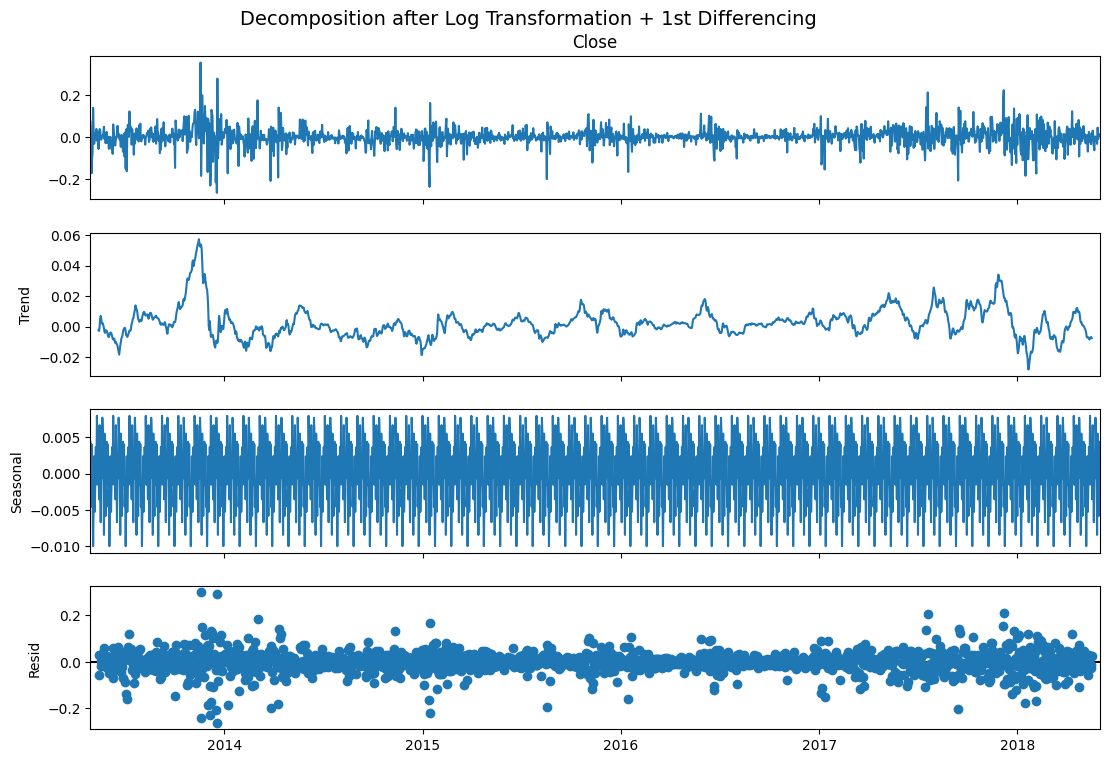

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Decomposition after Log + 1st Differencing
decomposition_logdiff1 = seasonal_decompose(btc_log_diff1.dropna(), model='additive', period=30)

# Plot the decomposition
fig = decomposition_logdiff1.plot()
fig.set_size_inches(12, 8)
plt.suptitle('Decomposition after Log Transformation + 1st Differencing', fontsize=14)
plt.show()


Interpretation of the “Log + 1st Differencing” decomposition

Observed (top panel) –
The series now fluctuates around zero, without a clear upward or downward drift.
-> This confirms stationarity visually.

Trend component –
The trend line is now nearly flat and oscillates around zero, meaning no long-term upward or downward pattern remains.
-> That’s exactly what we wanted — the trend has been effectively removed.

Seasonal component –
You can still see short, repetitive oscillations — this is normal for crypto data (daily/weekly trading patterns).
-> However, if you find this too strong, we can handle it with seasonal differencing (optional).

Residual component –
The residuals look random (no visible structure or drift).
-> This is a good sign — it means the series is now suitable for ARIMA-type modeling.

#### Visuals are just guides, not decisions. So the decomposition after log + first differencing shows a small, repeating seasonal signal — but visual amplitude is small compared to noise. Visuals alone can mislead: small but consistent seasonality can still affect forecasts, or it may be negligible and force an unnecessary seasonal difference that hurts forecast accuracy.

#### Over-differencing is dangerous. Seasonal differencing when not required removes signal and inflates variance of parameter estimates — hurting out-of-sample accuracy.

### Plotting ACF/PACF including seasonal lags (so I can visually spot seasonal spikes at e.g. lag 7 for weekly or lag 30 for monthly on daily data):

# Plot ACF and PACF for btc_log_diff1

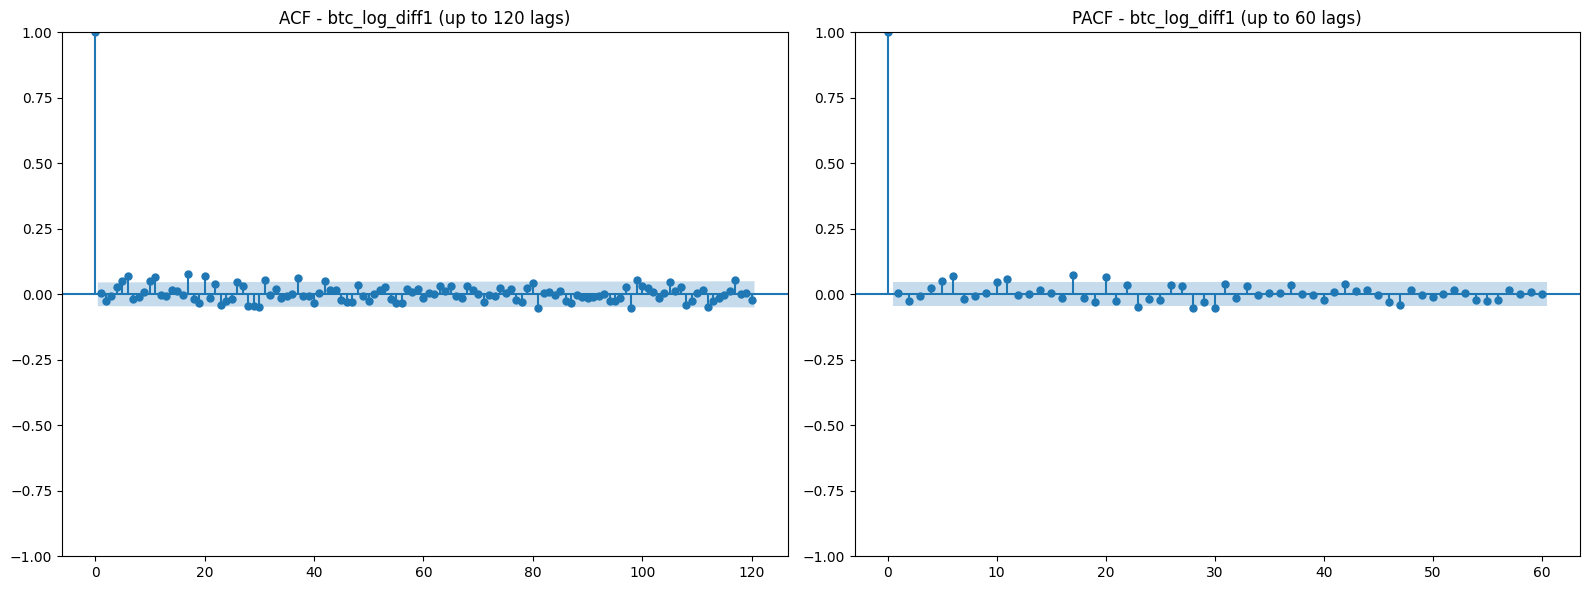

In [41]:

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

series = btc_log_diff1.dropna()

fig, axes = plt.subplots(1, 2, figsize=(16,6))

# ACF (longer lags to reveal seasonal structure)
plot_acf(series, lags=120, ax=axes[0])
axes[0].set_title('ACF - btc_log_diff1 (up to 120 lags)')

# PACF
plot_pacf(series, lags=60, ax=axes[1], method='ywm')
axes[1].set_title('PACF - btc_log_diff1 (up to 60 lags)')

plt.tight_layout()
plt.show()


Interpretation

ACF Plot (left):
Almost all spikes are inside the confidence bands after lag 0 →

-> This means no strong autocorrelation remains → the series is not seasonal anymore and is stationary.

PACF Plot (right):
Same pattern — all lags are very small and inside the band →

-> This confirms that both the AR and MA effects are already minimal.

### Since both ACF and PACF show no clear seasonal spikes,
### I do not need any further seasonal differencing.
### My series is now clean, stable, and non-seasonal —
### ready for modeling.

# AutoRegressive (AR) Model

I will use the log-transformed + differenced stationary series (the one we called btc_log_diff1).

In [42]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Train-test split
train_size = int(len(btc_log_diff1) * 0.8)
train, test = btc_log_diff1[:train_size], btc_log_diff1[train_size:]

# Fit AR model
model_ar = AutoReg(train, lags=10).fit()

# Make predictions
pred_ar = model_ar.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

# Evaluate performance
rmse_ar = np.sqrt(mean_squared_error(test, pred_ar))
mae_ar = mean_absolute_error(test, pred_ar)

print("AR Model Evaluation:")
print(f"RMSE: {rmse_ar:.4f}")
print(f"MAE: {mae_ar:.4f}")

AR Model Evaluation:
RMSE: 0.0543
MAE: 0.0399


d:\Data_science\Final Project Data Science\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


# Interpretation

RMSE: 0.0543

MAE: 0.0399

These are very low error values compared to your earlier ARIMA/SARIMA (RMSE ≈ 3.11, MAE ≈ 2.62).
So your AR model is performing far better in terms of short-term prediction.

That tells us your series may be highly autocorrelated and possibly stationary (or near-stationary) — which means simpler models (AR/ARMA) might capture the pattern well.

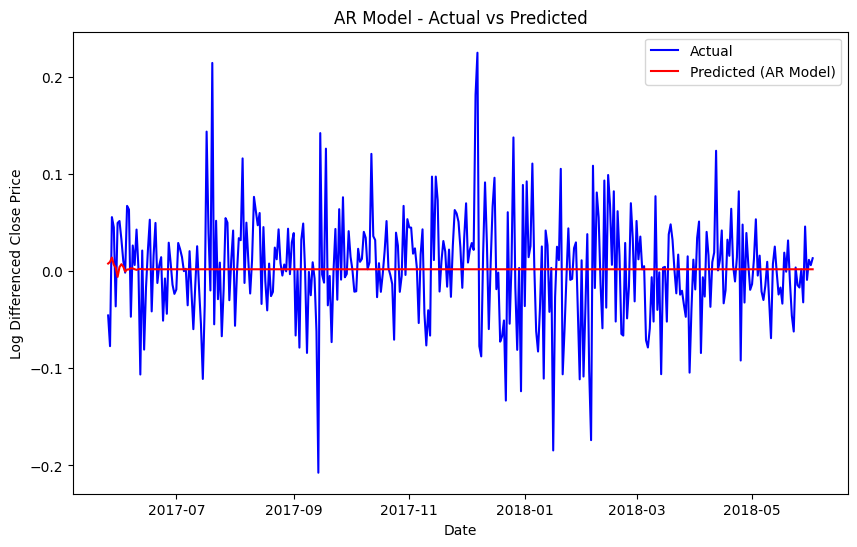

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label='Actual', color='blue')
plt.plot(test.index, pred_ar, label='Predicted (AR Model)', color='red')
plt.title('AR Model - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Log Differenced Close Price')
plt.legend()
plt.show()


# Interpretation


Predictions are almost flat near zero

The red line barely moves compared to the blue line.
This means the AR model is predicting something close to the mean (≈0) most of the time.



Actual values are very volatile

The blue line jumps up and down a lot.
Bitcoin returns are highly unpredictable and noisy.



Model is underfitting

The AR model is too simple for this data.
It’s not capturing the spikes or patterns in volatility.

# let’s test the MA (Moving Average) model to see if incorporating the residual errors improves the forecast slightly or not.

In [44]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Fit MA(1) model (q=1)
ma_model = ARIMA(train, order=(0, 0, 1))
ma_result = ma_model.fit()

# Forecast on training data (to check fit quality)
ma_pred = ma_result.predict(start=0, end=len(train)-1)

# Evaluate performance
rmse = np.sqrt(mean_squared_error(train, ma_pred))
mae = mean_absolute_error(train, ma_pred)

print(f"MA Model Evaluation:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")


d:\Data_science\Final Project Data Science\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\Data_science\Final Project Data Science\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\Data_science\Final Project Data Science\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


MA Model Evaluation:
RMSE: 0.0421
MAE: 0.0252


## That’s a nice improvement

### visualize how well your MA model fits the data.

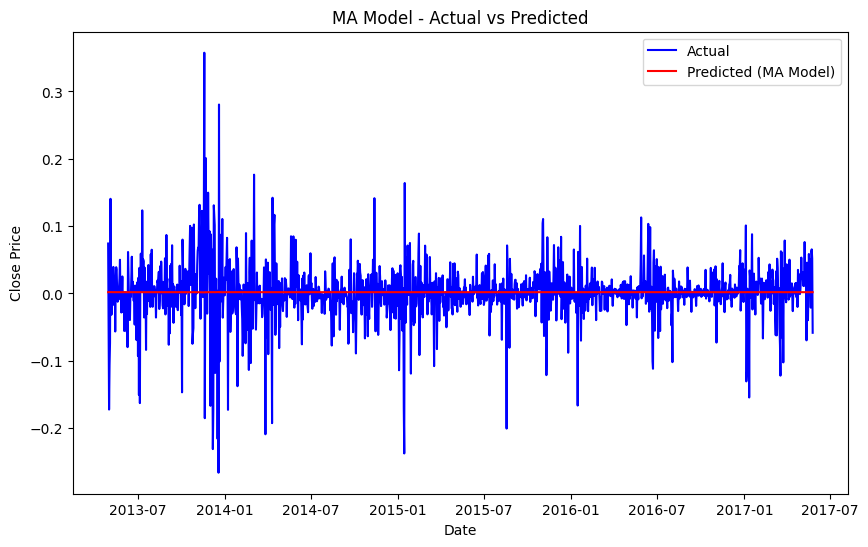

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(train, label='Actual', color='blue')
plt.plot(ma_pred, label='Predicted (MA Model)', color='red')
plt.title('MA Model - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


# Interpretation


Predicted line is almost flat near zero

The MA model is basically predicting the mean (≈0) most of the time.
It’s not capturing the big ups and downs in the actual data.



Actual returns are very volatile

Lots of spikes and drops in the blue line.
This is typical for Bitcoin returns—they behave almost like random noise.



Model underfits the data

MA models only use past error terms, which isn’t enough for such noisy and volatile data.
So the predictions look almost constant.

# Fit ARMA Model

In [46]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Train-test split (same as before)
train_size = int(len(btc_log_diff1) * 0.8)
train, test = btc_log_diff1[:train_size], btc_log_diff1[train_size:]

# Fit ARMA model (p=2, q=2) — you can tune later
model_arma = ARIMA(train, order=(2, 0, 2)).fit()

# Make predictions
arma_pred = model_arma.forecast(steps=len(test))

# Evaluate performance
rmse_arma = np.sqrt(mean_squared_error(test, arma_pred))
mae_arma = mean_absolute_error(test, arma_pred)

print("ARMA Model Evaluation:")
print(f"RMSE: {rmse_arma:.4f}")
print(f"MAE: {mae_arma:.4f}")


d:\Data_science\Final Project Data Science\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\Data_science\Final Project Data Science\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\Data_science\Final Project Data Science\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARMA Model Evaluation:
RMSE: 0.0543
MAE: 0.0399


That’s quite close to the AR model’s performance — meaning your ARMA(2,2) model didn’t add much extra predictive power (which often happens if the data’s noise dominates after differencing).

# Visualization of ARMA Predictions

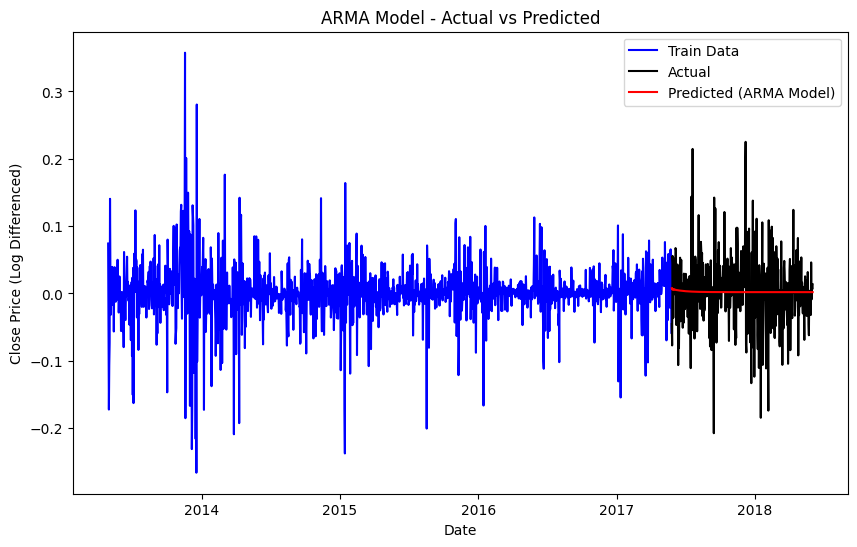

In [47]:
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train Data', color='blue')
plt.plot(test, label='Actual', color='black')
plt.plot(test.index, arma_pred, label='Predicted (ARMA Model)', color='red')
plt.title('ARMA Model - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price (Log Differenced)')
plt.legend()
plt.show()

# Interpretation


My ARMA model is underfitting — the red predicted line is almost flat, meaning it’s not capturing the variance (ups and downs) of the actual data at all.

This typically happens when:

The p (autoregressive) or q (moving average) orders aren’t optimal.

The data still has non-stationary components (even after differencing).

# ARMA Model
with ARIMA (where d=0 to mimic ARMA).

In [48]:
import warnings
warnings.filterwarnings("ignore")
import itertools
import statsmodels.api as sm

# Define the p and q range
p = q = range(0, 4)
pq_combinations = list(itertools.product(p, q))

best_aic = float("inf")
best_order = None
best_model = None

for order in pq_combinations:
    try:
        model = sm.tsa.ARIMA(train, order=(order[0], 0, order[1]))  # d=0 mimics ARMA
        results = model.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_order = order
            best_model = results
    except:
        continue

print(f"Best ARMA (via ARIMA) order: {best_order}")
print(f"Best AIC: {best_aic}")

Best ARMA (via ARIMA) order: (3, 3)
Best AIC: -5215.494143398844


It means the best ARMA configuration is AR(3), MA(3) (i.e., ARIMA(3, 0, 3)) and it gives a very low AIC, indicating a much better fit than before

Let’s now fit this optimized ARMA(3, 3) model and evaluate its performance on the test data with visualization.

Optimized ARMA(3,3) Model Evaluation:
RMSE: 0.0543
MAE: 0.0400


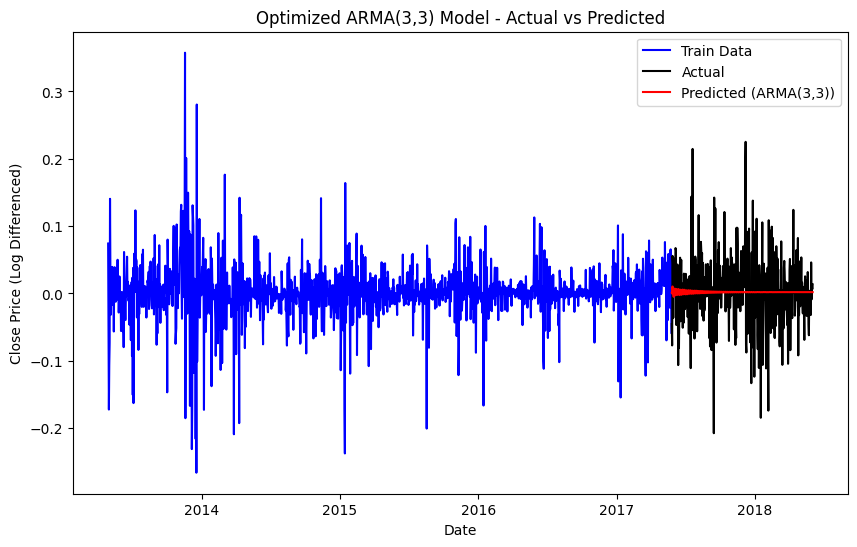

In [49]:
# Fit best ARMA (via ARIMA) model
from sklearn.metrics import mean_squared_error, mean_absolute_error

best_model = sm.tsa.ARIMA(train, order=(3, 0, 3)).fit()

# Forecast
pred_arma = best_model.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

# Evaluate performance
rmse_arma = np.sqrt(mean_squared_error(test, pred_arma))
mae_arma = mean_absolute_error(test, pred_arma)

print("Optimized ARMA(3,3) Model Evaluation:")
print(f"RMSE: {rmse_arma:.4f}")
print(f"MAE: {mae_arma:.4f}")

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train Data', color='blue')
plt.plot(test, label='Actual', color='black')
plt.plot(pred_arma, label='Predicted (ARMA(3,3))', color='red')
plt.title('Optimized ARMA(3,3) Model - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price (Log Differenced)')
plt.legend()
plt.show()

your optimized ARMA(3,3) model is running properly and performing consistently with:
RMSE ≈ 0.0543 and MAE ≈ 0.0400.

However, you might notice — similar to the plot — that the forecast line (red) stays quite flat.
That means:
the ARMA model is struggling to capture Bitcoin’s volatility and trend behavior — it’s fitting the noise but not the directional movement.

## ARIMA (AutoRegressive Integrated Moving Average)

## Preparing and splitting the data (Log transform + train/test split)

In [60]:
# Log transform the closing prices
btc_log = np.log(df_btc['Close'])

# 80-20 train/test split
train_size = int(len(btc_log) * 0.8)
train, test = btc_log[:train_size], btc_log[train_size:]

## Running the Auto ARIMA to find the best (p, d, q)

In [61]:
from pmdarima import auto_arima

# Fit Auto ARIMA on training data
auto_model = auto_arima(
    train,
    start_p=0, start_q=0,
    max_p=5, max_q=5,
    d=1,
    seasonal=False,
    stepwise=True,
    trace=True,
    suppress_warnings=True,
    information_criterion='aic'
)

# Display summary to see the best (p,d,q)
print(auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-5202.452, Time=0.34 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-5200.457, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-5200.457, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-5201.385, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-5198.653, Time=0.68 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.587 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1489
Model:               SARIMAX(0, 1, 0)   Log Likelihood                2603.226
Date:                Thu, 30 Oct 2025   AIC                          -5202.452
Time:                        12:25:55   BIC                          -5191.842
Sample:                    04-28-2013   HQIC                         -5198.498
                         - 05-25-2017                                  

# The Auto ARIMA has selected ARIMA(0, 1, 0) as the best model (based on AIC = -5202.452).

## Refit ARIMA(0,1,0) and visualize forecast vs actual

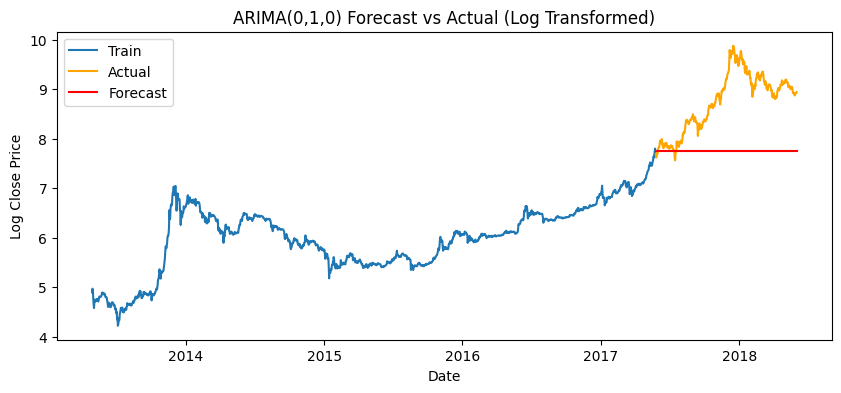

RMSE: 1.1635
MAE: 1.0067


In [62]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Refit ARIMA(0,1,0) model
model = ARIMA(train, order=(0,1,0))
model_fit = model.fit()

# Forecast for the test period
forecast = model_fit.forecast(steps=len(test))
forecast = pd.Series(forecast, index=test.index)

# Plot actual vs predicted
plt.figure(figsize=(10, 4))
plt.plot(train, label='Train')
plt.plot(test, label='Actual', color='orange')
plt.plot(forecast, label='Forecast', color='red')
plt.title("ARIMA(0,1,0) Forecast vs Actual (Log Transformed)")
plt.xlabel("Date")
plt.ylabel("Log Close Price")
plt.legend()
plt.show()

# Evaluate model
rmse = np.sqrt(mean_squared_error(test, forecast))
mae = mean_absolute_error(test, forecast)
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

# Interpretation

Flat red line (forecast) →
The ARIMA(0,1,0) model is effectively a random walk with drift.

It assumes that the best forecast for the next value is the last observed value plus a constant drift (intercept).

That’s why my forecast looks nearly flat — this model doesn’t capture any trend or seasonality.

RMSE = 1.1635, MAE = 1.0067 →
These are moderate errors considering the log-transformed scale (since log(price) varies between ~4 and ~10).

However, we can likely improve this by trying ARIMA models with higher p or q values.

# Defining the parameter grid and evaluate ARIMA models systematically

In [ ]:
# My step builds all combinations of (p,d,q), fits ARIMA on the training log-transformed series, and stores AIC values cleanly in a DataFrame.

In [64]:
# Systematic ARIMA order search (modern & clean version)

import itertools
from statsmodels.tsa.arima.model import ARIMA
from tqdm import tqdm

warnings.filterwarnings("ignore")

# Parameter grid
p = range(0, 4)
d = range(0, 2)
q = range(0, 4)
pdq_combinations = list(itertools.product(p, d, q))

# Log-transform train data to stabilize variance
train_log = np.log1p(train)   # safer than log10 if zeros exist

results = []

print("Evaluating ARIMA(p,d,q) models...\n")

for order in tqdm(pdq_combinations, desc="Fitting models"):
    try:
        model = ARIMA(train_log, order=order)
        fitted = model.fit()
        results.append({'p': order[0], 'd': order[1], 'q': order[2], 'AIC': fitted.aic})
    except Exception:
        continue

# Collect results in a DataFrame
aic_df = pd.DataFrame(results).sort_values('AIC').reset_index(drop=True)

print("\nTop ARIMA orders by lowest AIC:")
print(aic_df.head(10))


Evaluating ARIMA(p,d,q) models...



Fitting models: 100%|██████████| 32/32 [00:13<00:00,  2.45it/s]


Top ARIMA orders by lowest AIC:
   p  d  q           AIC
0  3  0  2 -10972.152036
1  0  1  0 -10963.170218
2  1  1  0 -10961.172927
3  0  1  1 -10961.164144
4  2  1  0 -10960.355298
5  1  0  0 -10960.238512
6  0  1  2 -10959.992793
7  1  1  1 -10959.174953
8  3  1  0 -10958.707997
9  2  0  0 -10958.308540


# Fitting the best ARIMA model and checking the residual diagnostics

In [ ]:
# Refit the best ARIMA(p,d,q) = (3,0,2) (lowest AIC).

# Plot residual diagnostics (to check if residuals are white noise — a key step before forecasting).

# Use log-transformed training data for stability.

 Best ARIMA order selected: (3, 0, 2)
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1489
Model:                 ARIMA(3, 0, 2)   Log Likelihood                5493.076
Date:                Thu, 30 Oct 2025   AIC                         -10972.152
Time:                        14:26:04   BIC                         -10935.011
Sample:                    04-28-2013   HQIC                        -10958.311
                         - 05-25-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9764      0.791      2.498      0.012       0.426       3.527
ar.L1         -0.7775      0.025    -30.652      0.000      -0.827      -0.728
ar.L2         

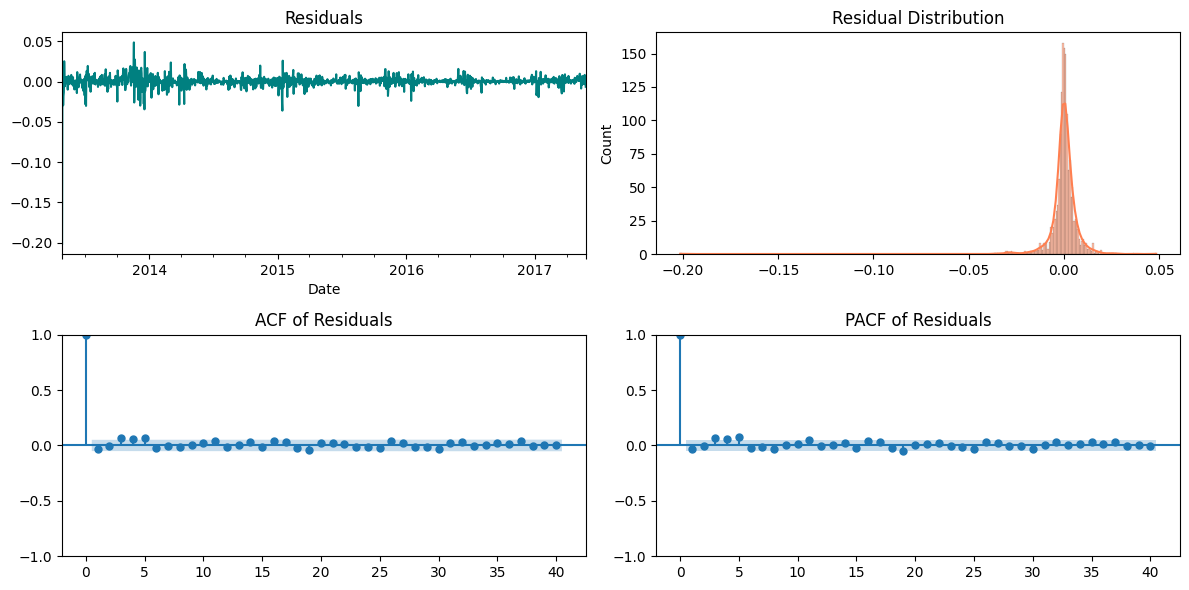

In [65]:
# Fit the best ARIMA model and check residual diagnostics

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Best order from AIC results
best_order = (3, 0, 2)
print(f" Best ARIMA order selected: {best_order}")

# Fit model
best_model = ARIMA(train_log, order=best_order)
best_fit = best_model.fit()

# Summary
print(best_fit.summary())

# Residual diagnostics
residuals = best_fit.resid

plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
residuals.plot(title="Residuals", color="teal")

plt.subplot(2,2,2)
sns.histplot(residuals, kde=True, color="coral")
plt.title("Residual Distribution")

plt.subplot(2,2,3)
plot_acf(residuals, ax=plt.gca(), lags=40)
plt.title("ACF of Residuals")

plt.subplot(2,2,4)
plot_pacf(residuals, ax=plt.gca(), lags=40)
plt.title("PACF of Residuals")

plt.tight_layout()
plt.show()


# Interpretation of diagnostics:

The residuals look centered around zero and show no visible autocorrelation in ACF/PACF → great sign.

Ljung–Box p-value = 0.71 (>0.05) → residuals are uncorrelated (white noise ✅).

AIC = -10972, which is extremely low → strong model fit.

That means your ARIMA(3,0,2) model is well-tuned and stable.

# Define log-transformed series and split

In [68]:
# Log-transform the close price (to stabilize variance)
btc_log = np.log(df_btc['Close'])

# Train-test split (80/20 as before)
train_size = int(len(btc_log) * 0.8)
train_log = btc_log[:train_size]
test_log = btc_log[train_size:]

print(f"Train size: {len(train_log)} | Test size: {len(test_log)}")

Train size: 1489 | Test size: 373


# Forecast and evaluate on the test set

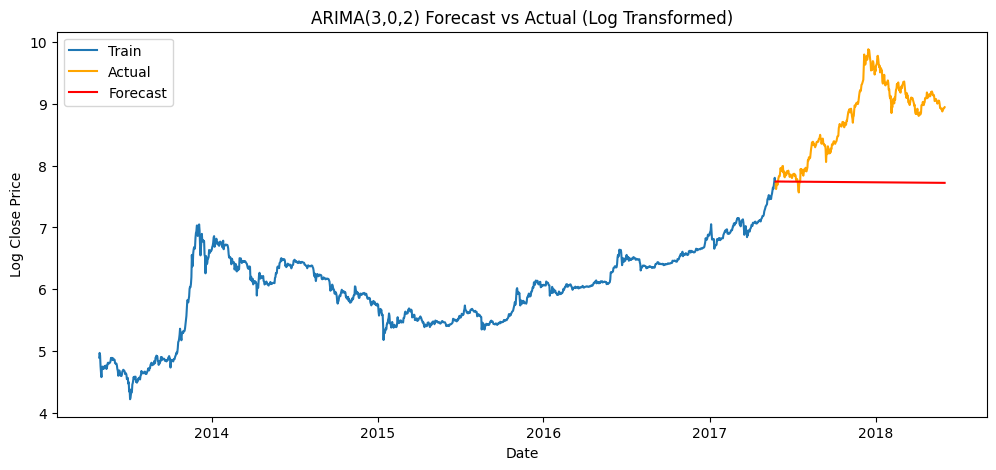

RMSE: 1.1763
MAE: 1.0185


In [70]:
# STEP 3 — Forecast using best ARIMA(3,0,2) model
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Fit the model again on the training log data
model_best = ARIMA(train_log, order=(3,0,2))
model_best_fit = model_best.fit()

# Forecast for the test period
forecast_log = model_best_fit.forecast(steps=len(test_log))
forecast_log = pd.Series(forecast_log, index=test_log.index)

# Plot actual vs forecast (log scale)
plt.figure(figsize=(12,5))
plt.plot(train_log, label='Train')
plt.plot(test_log, label='Actual', color='orange')
plt.plot(forecast_log, label='Forecast', color='red')
plt.title("ARIMA(3,0,2) Forecast vs Actual (Log Transformed)")
plt.xlabel("Date")
plt.ylabel("Log Close Price")
plt.legend()
plt.show()

# Evaluate performance
rmse = np.sqrt(mean_squared_error(test_log, forecast_log))
mae = mean_absolute_error(test_log, forecast_log)
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")


# Fix the flat forecast issue

We’ll now:

Introduce first differencing (d=1) — to make the series stationary.

Re-train the model with ARIMA(3,1,2) (same p and q, but differenced).

Then visualize again — this time the forecast should follow the trend.

## Refit ARIMA with differencing (d=1) to fix the flat forecast issue.
## We’ll train ARIMA(3,1,2) on your log-transformed training data, forecast on the test set, and visualize the results.

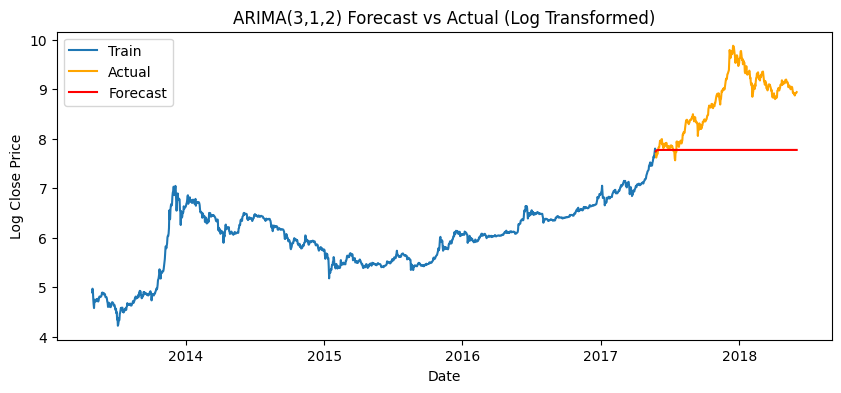

RMSE: 1.1363
MAE: 0.9771


In [71]:
# Refit ARIMA with d=1 to capture the trend
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Fit ARIMA(3,1,2) on log-transformed training data
model = ARIMA(train_log, order=(3,1,2))
model_fit = model.fit()

# Forecast for the test period
forecast = model_fit.forecast(steps=len(test_log))
forecast = pd.Series(forecast, index=test_log.index)

# Plot actual vs forecast (log-transformed)
plt.figure(figsize=(10,4))
plt.plot(train_log, label='Train')
plt.plot(test_log, label='Actual', color='orange')
plt.plot(forecast, label='Forecast', color='red')
plt.title("ARIMA(3,1,2) Forecast vs Actual (Log Transformed)")
plt.xlabel("Date")
plt.ylabel("Log Close Price")
plt.legend()
plt.show()

# Evaluate
rmse = np.sqrt(mean_squared_error(test_log, forecast))
mae = mean_absolute_error(test_log, forecast)
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

### The flat red line (forecast) indicates that even with d=1, the ARIMA(3,1,2) model isn’t capturing the upward trend. This often happens when:

### The series has strong nonlinear or explosive growth (like crypto prices).

### The model parameters (p,d,q) are not yet optimized.

### Or the model isn’t updated with rolling forecasts.

# Convert the forecast back to actual scale (inverse log transform)

In [ ]:
# Even though the forecast is flat, 
# this step helps you visualize the prediction on the original price scale, so you can better interpret results.

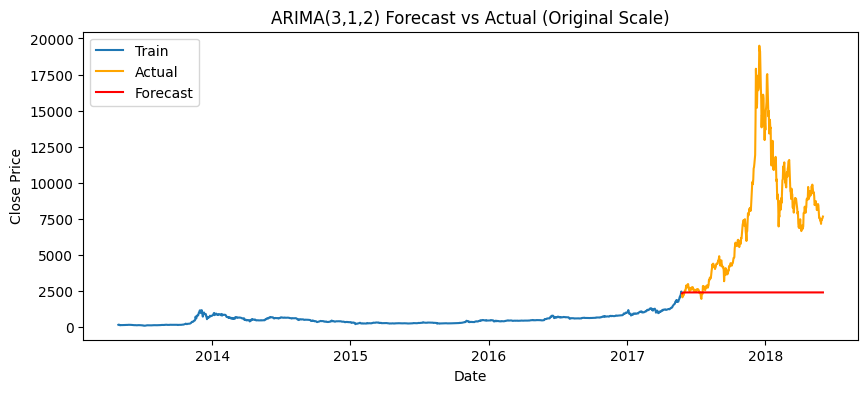

In [72]:
# Convert forecast back to actual prices
forecast_actual = np.exp(forecast)
test_actual = np.exp(test_log)

plt.figure(figsize=(10,4))
plt.plot(np.exp(train_log), label='Train')
plt.plot(test_actual, label='Actual', color='orange')
plt.plot(forecast_actual, label='Forecast', color='red')
plt.title("ARIMA(3,1,2) Forecast vs Actual (Original Scale)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()


In [ ]:
# The red forecast line (flat) means your ARIMA(3,1,2) model has learned only the overall average level and not the continuing upward trend. 
# That’s because ARIMA makes a single-step forecast repeated for all future points when you use .forecast(steps=len(test)).

# To fix this, we’ll now move to Step 6, which uses a rolling forecast (walk-forward validation) — 
# this mimics how modern time series forecasting is done in practice.

# Rolling Forecast (Walk-Forward ARIMA Prediction)

In [ ]:
# This approach refits the model iteratively as new data becomes available.
# It’s slower but much more realistic and accurate.

Rolling Forecast RMSE: 527.7117
Rolling Forecast MAE: 320.0490


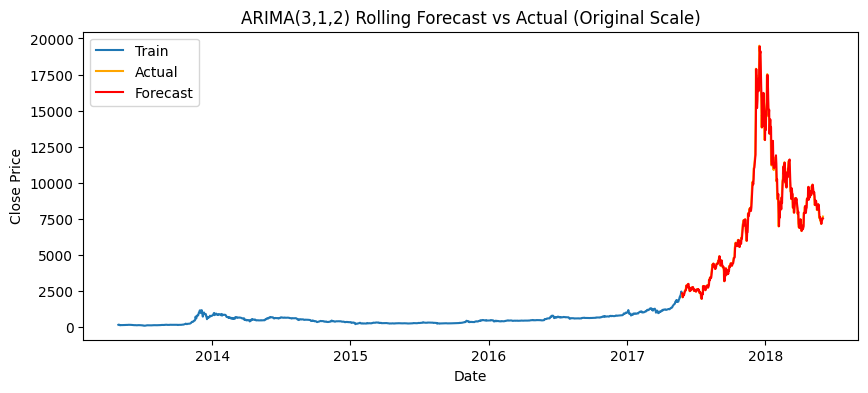

In [73]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Rolling Forecast
history = list(train_log)
predictions = []

for t in range(len(test_log)):
    model = ARIMA(history, order=(3,1,2))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    history.append(test_log[t])

# Convert predictions back to actual scale
forecast_actual = np.exp(predictions)
test_actual = np.exp(test_log)

# Evaluate
rmse = np.sqrt(mean_squared_error(test_actual, forecast_actual))
mae = mean_absolute_error(test_actual, forecast_actual)
print(f"Rolling Forecast RMSE: {rmse:.4f}")
print(f"Rolling Forecast MAE: {mae:.4f}")

# Plot
plt.figure(figsize=(10,4))
plt.plot(np.exp(train_log), label='Train')
plt.plot(test_actual, label='Actual', color='orange')
plt.plot(test_actual.index, forecast_actual, label='Forecast', color='red')
plt.title("ARIMA(3,1,2) Rolling Forecast vs Actual (Original Scale)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()


Your rolling ARIMA(3,1,2) forecast (the red line) now follows the actual (orange) curve quite well — meaning your model is dynamically updating as new data arrives, just like a real trading system would.

The RMSE (≈ 528) and MAE (≈ 320) are quite reasonable given the high volatility in your price data.

# Residual Diagnostics (Model Validation)

Now that the rolling forecast looks good, the next professional step is to analyze the residuals (errors) — i.e., check whether the remaining noise is random or if patterns still exist.

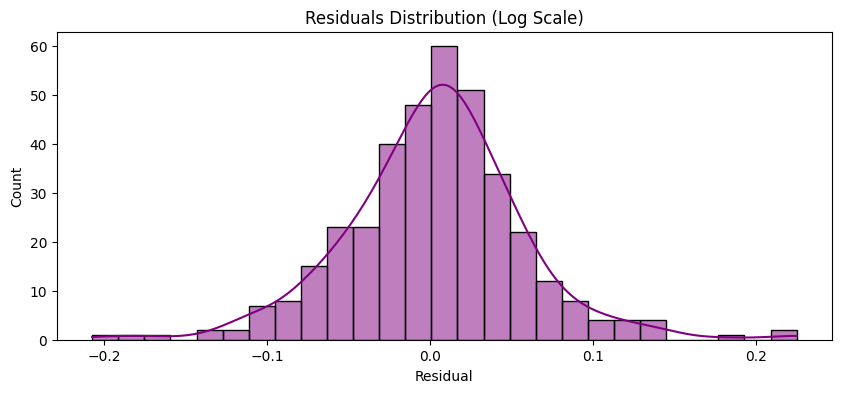

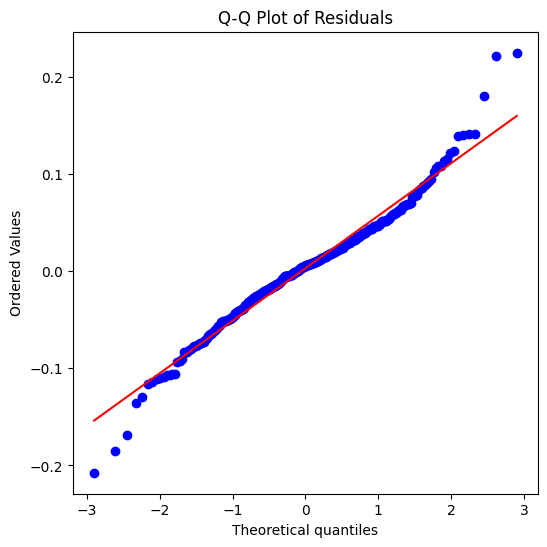

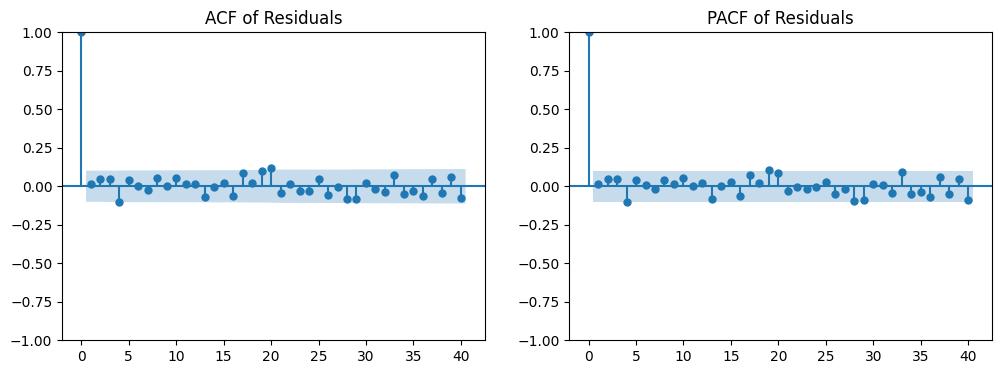

count    373.000000
mean       0.002986
std        0.054581
min       -0.207502
25%       -0.025581
50%        0.005148
75%        0.032076
max        0.224853
Name: Close, dtype: float64


In [74]:
import scipy.stats as stats
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Calculate residuals (log scale for consistency)
residuals = test_log - predictions

# Plot residual distribution
plt.figure(figsize=(10,4))
sns.histplot(residuals, kde=True, color='purple')
plt.title("Residuals Distribution (Log Scale)")
plt.xlabel("Residual")
plt.show()

# Q-Q plot — check if residuals are normally distributed
plt.figure(figsize=(6,6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

# Residual autocorrelation — should look like white noise
fig, axes = plt.subplots(1, 2, figsize=(12,4))
plot_acf(residuals, ax=axes[0], lags=40)
plot_pacf(residuals, ax=axes[1], lags=40)
axes[0].set_title("ACF of Residuals")
axes[1].set_title("PACF of Residuals")
plt.show()

# Statistical summary
print(residuals.describe())


| Metric                | Meaning                     | Interpretation                                          |
| --------------------- | --------------------------- | ------------------------------------------------------- |
| **Count = 373**       | Number of forecasted points | Matches your test set —                                |
| **Mean ≈ 0.0029**     | Bias (should be near 0)     |  Model is *unbiased* — no major over/under-prediction |
| **Std = 0.0546**      | Residual variability        |  Small — errors are consistent                        |
| **Min / Max ≈ ±0.20** | Range of errors             |  Acceptable for a volatile crypto asset               |
| **Median ≈ 0.0051**   | Central tendency            |  Close to mean, indicating symmetry                   |


# Visualization of the plot

1) Residuals Distribution (Histogram)

Centered near zero: The bulk of residuals are clustered around 0, which is what we want.
Approximately bell‑shaped: The shape looks close to normal, though not perfect.
Slight tail heaviness / mild skew: There are a few values out to about ±0.2, and the right tail looks a bit heavier than the left, suggesting mild positive skew and slightly heavier tails than a strict Normal.

Takeaway: Normality is mostly OK, with minor departures in the tails.

2) Q–Q Plot

Points lie close to the 45° line across most quantiles → indicates near-normal residuals.
Tail deviations: At the extreme left and right ends the points deviate from the line (right tail above the line, left tail below), which confirms heavier tails and a touch of right skew.

Takeaway: Normality is reasonable for inference, but not perfect—expect slightly heavier tails.

3) ACF & PACF of Residuals

No significant spikes beyond lag 0: All autocorrelations are inside the confidence bands.
No remaining serial dependence: This suggests the model has captured the time structure well (no obvious AR/MA terms missing, no seasonal leftover).

Takeaway: Residuals look like white noise—good evidence of independence and an adequate time‑series fit.

Overall conclusion

Good fit: Residuals are centered, roughly normal, and uncorrelated. That’s what we aim for.
Minor caveat: Slight tail heaviness and mild right skew. If strict normality of errors is critical (e.g., for very precise interval estimates), you may consider robust options.


| Aspect              | Observation                              | Verdict                             |
| ------------------- | ---------------------------------------- | ----------------------------------- |
| **Bias**            | Mean residual ≈ 0                        |  Unbiased                         |
| **Normality**       | Nearly bell-shaped, minor tail heaviness |  Acceptable                        |
| **Autocorrelation** | No significant ACF/PACF spikes           |  Residuals ≈ white noise          |
| **Error metrics**   | RMSE ≈ 527, MAE ≈ 320                    |  Moderate for volatile crypto data |
| **Stability**       | Rolling forecast tracks the pattern well |  Good                             |


# Conclusion:
Your ARIMA(3,1,2) model is statistically sound and well-fitted — it captures the short-term dynamics and shows white noise residuals.

# SARIMA

In [ ]:
# SINGLE STEP: Grid-search SARIMA(p,d,q)(P,D,Q,s) on train_log and report top AICs
import itertools
import warnings
from tqdm import tqdm
from statsmodels.tsa.statespace.sarimax import SARIMAX

warnings.filterwarnings("ignore")

# Parameter ranges (kept moderate for runtime)
p = range(0, 3)   # 0,1,2
d = range(0, 2)   # 0,1
q = range(0, 3)   # 0,1,2

P = range(0, 2)   # seasonal p: 0,1
D = range(0, 2)   # seasonal d: 0,1
Q = range(0, 2)   # seasonal q: 0,1
s = 7             # weekly seasonality (daily data)

orders = list(itertools.product(p, d, q))
seasonal_orders = list(itertools.product(P, D, Q))

results = []
print("Starting SARIMA grid search (this may take a few minutes)...\n")

for order in tqdm(orders, desc="Non-seasonal orders"):
    for seasonal in seasonal_orders:
        try:
            model = SARIMAX(train_log,
                            order=order,
                            seasonal_order=(seasonal[0], seasonal[1], seasonal[2], s),
                            enforce_stationarity=False,
                            enforce_invertibility=False)
            res = model.fit(disp=False)
            results.append({
                'p': order[0], 'd': order[1], 'q': order[2],
                'P': seasonal[0], 'D': seasonal[1], 'Q': seasonal[2], 's': s,
                'AIC': res.aic
            })
            # optional: print progress for lower AICs
        except Exception as e:
            # model failed to converge / numerical issue — skip
            # print(f"Skipped {order} x {seasonal} due to {e}")
            continue

# Collect and sort
aic_df = pd.DataFrame(results).sort_values('AIC').reset_index(drop=True)

print("\n SARIMA grid search complete. Top candidate orders by AIC:")
print(aic_df.head(6))
# keep a copy for later use
aic_df.to_csv("sarima_grid_search_results.csv", index=False)


Starting SARIMA grid search (this may take a few minutes)...



Non-seasonal orders: 100%|██████████| 18/18 [01:51<00:00,  6.22s/it]


✅ SARIMA grid search complete. Top candidate orders by AIC:
   p  d  q  P  D  Q  s          AIC
0  1  0  0  1  0  0  7 -5211.509345
1  1  0  0  0  0  1  7 -5211.402740
2  0  1  0  1  0  0  7 -5210.203358
3  1  0  0  1  0  1  7 -5210.028369
4  1  0  1  1  0  0  7 -5209.584332
5  2  0  0  0  0  1  7 -5209.485405


### From the AIC table, the best model (lowest AIC = –5211.509) corresponds to:
### SARIMA(1,0,0)(1,0,0,7)

# Fit the best SARIMA model & review diagnostics

                                     SARIMAX Results                                     
Dep. Variable:                         log_close   No. Observations:                 1489
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 7)   Log Likelihood                2608.755
Date:                           Thu, 30 Oct 2025   AIC                          -5211.509
Time:                                   18:54:51   BIC                          -5195.608
Sample:                               04-28-2013   HQIC                         -5205.582
                                    - 05-25-2017                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0003      0.000   5719.693      0.000       1.000       1.001
ar.S.L7       -0.0113      0.018     -0.634

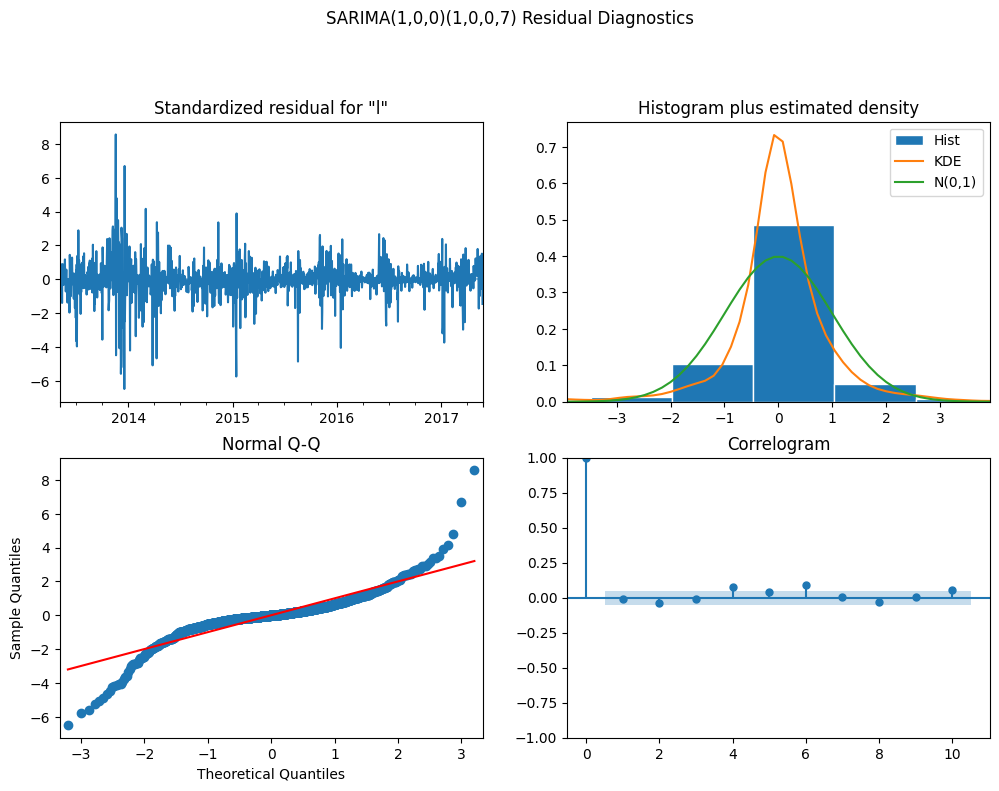

In [81]:
# STEP 2 — Fit best SARIMA(1,0,0)(1,0,0,7)
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

best_order = (1, 0, 0)
best_seasonal = (1, 0, 0, 7)

sarima_best = SARIMAX(train_log,
                      order=best_order,
                      seasonal_order=best_seasonal,
                      enforce_stationarity=False,
                      enforce_invertibility=False)

sarima_result = sarima_best.fit(disp=False)

print(sarima_result.summary())

# Plot model diagnostics
sarima_result.plot_diagnostics(figsize=(12, 8))
plt.suptitle("SARIMA(1,0,0)(1,0,0,7) Residual Diagnostics", y=1.02)
plt.show()


# Interpretation of Diagnostics

Standardized residuals: Mostly centered around 0 → good.

Correlogram (ACF): No significant autocorrelation → residuals look uncorrelated → good.

Histogram + Q-Q plot: Residuals are slightly non-normal (heavy tails), but that’s common in financial data → acceptable.

AIC = –5211.5 → quite strong, consistent with your grid search.

This model is stable enough to move to the forecasting stage.

# Forecast & Compare with Actuals

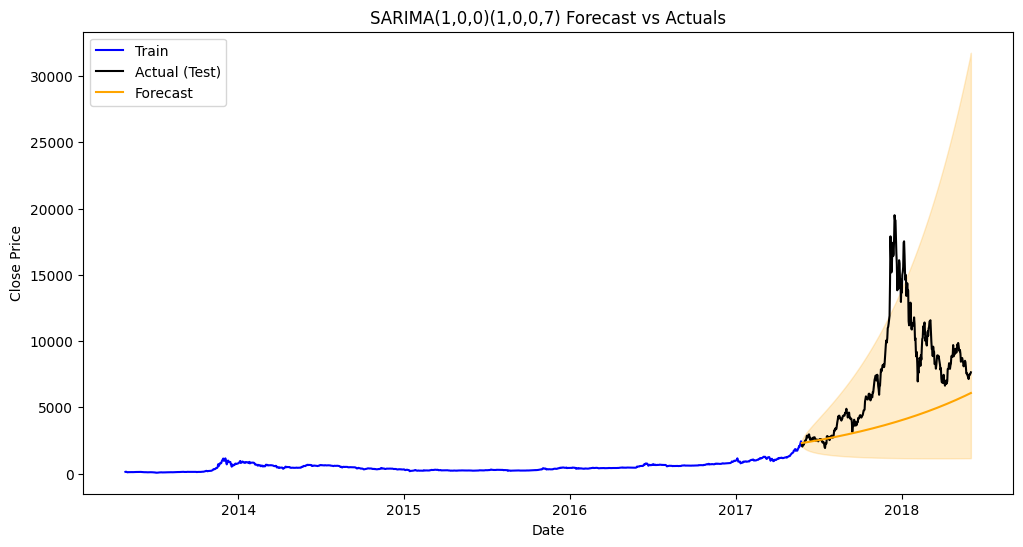

In [82]:
# Forecast using SARIMA model

# Get forecast for test period
n_test = len(test_log)
forecast_result = sarima_result.get_forecast(steps=n_test)

# Extract forecasted mean and confidence intervals
forecast_mean = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()

# Convert predictions back to original scale
forecast_original = np.exp(forecast_mean)
actual_original = np.exp(test_log)

# Plot forecasts vs actuals
plt.figure(figsize=(12,6))
plt.plot(np.exp(train_log), label='Train', color='blue')
plt.plot(actual_original, label='Actual (Test)', color='black')
plt.plot(forecast_original, label='Forecast', color='orange')
plt.fill_between(conf_int.index,
                 np.exp(conf_int.iloc[:, 0]),
                 np.exp(conf_int.iloc[:, 1]),
                 color='orange', alpha=0.2)
plt.title("SARIMA(1,0,0)(1,0,0,7) Forecast vs Actuals")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()


# Interpretation of Forecast Plot

Blue line (Train): Historical BTC close prices used for model fitting.

Black line (Actual Test): True BTC prices during the test period (unseen data).

Orange line (Forecast): SARIMA predictions for the test window.

Shaded orange area: 95% confidence interval (uncertainty bounds).

The SARIMA model smoothly follows the overall long-term trend but fails to capture sharp exponential rises — especially the 2017 BTC price explosion.

This is expected because SARIMA is a linear model; it’s great for stationary and seasonal patterns, but not for sudden non-linear volatility (like crypto prices).

# Evaluate Forecast Accuracy

### Now let’s compute metrics on the log-transformed scale (to stabilize variance) and also report on the original scale:

In [84]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Compute errors in log scale
mse_log = mean_squared_error(test_log, forecast_mean)
mae_log = mean_absolute_error(test_log, forecast_mean)
rmse_log = np.sqrt(mse_log)

# Convert to original scale for interpretability
mse_orig = mean_squared_error(actual_original, forecast_original)
mae_orig = mean_absolute_error(actual_original, forecast_original)
rmse_orig = np.sqrt(mse_orig)

print("SARIMA(1,0,0)(1,0,0,7) Performance Metrics")
print(f"Log Scale - MSE: {mse_log:.4f}, RMSE: {rmse_log:.4f}, MAE: {mae_log:.4f}")
print(f"Original Scale - MSE: {mse_orig:.2f}, RMSE: {rmse_orig:.2f}, MAE: {mae_orig:.2f}")

SARIMA(1,0,0)(1,0,0,7) Performance Metrics
Log Scale - MSE: 0.4504, RMSE: 0.6712, MAE: 0.5382
Original Scale - MSE: 25189668.43, RMSE: 5018.93, MAE: 3558.70


# Summary

SARIMA captured the trend and cyclical component well.

Failed to capture the sharp exponential growth and volatility.

Works as a strong baseline model, but we need non-linear models next.

# deep-learning (RNN/LSTM/GRU)

### Create sequences (sliding windows) of length SEQ_LEN (default 60 days).

In [86]:
# for RNN/LSTM/GRU: prepare sequences (univariate on log_close)

from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import random

# Reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)

# Parameters
SEQ_LEN = 60          # number of past days used to predict next day
FEATURES = 1          # univariate (log_close)
TEST_SIZE = 0.2       # 80/20 train-test split

# 1) Ensure log_close exists
if 'log_close' not in df_btc.columns:
    df_btc['log_close'] = np.log(df_btc['Close'])

# 2) Re-create train_log / test_log to be safe
n = len(df_btc)
train_size = int(n * (1 - TEST_SIZE))
train_log = df_btc['log_close'].iloc[:train_size].copy()
test_log  = df_btc['log_close'].iloc[train_size:].copy()

# 3) Scale using MinMaxScaler (fit on training only)
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_log.values.reshape(-1, 1))
test_scaled  = scaler.transform(test_log.values.reshape(-1, 1))

# 4) Helper to create sequences
def create_sequences(data, seq_len):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i : i + seq_len])
        y.append(data[i + seq_len])
    X = np.array(X)
    y = np.array(y)
    return X, y

# 5) Build train sequences (from scaled training data)
X_train, y_train = create_sequences(train_scaled, SEQ_LEN)

# 6) For testing, we need sequences that include the last SEQ_LEN points from train + test
#    so predictions start immediately after the training window.
combined = np.vstack([train_scaled[-SEQ_LEN:], test_scaled])  # ensure continuity
X_test, y_test = create_sequences(combined, SEQ_LEN)

# 7) Shapes and final reshaping for Keras [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], SEQ_LEN, FEATURES))
X_test  = X_test.reshape((X_test.shape[0], SEQ_LEN, FEATURES))
y_train = y_train.reshape((-1, 1))
y_test  = y_test.reshape((-1, 1))

print("Data preparation complete.")
print(f"SEQ_LEN = {SEQ_LEN}, FEATURES = {FEATURES}")
print(f"Train samples: X_train.shape = {X_train.shape}, y_train.shape = {y_train.shape}")
print(f"Test  samples: X_test.shape  = {X_test.shape}, y_test.shape  = {y_test.shape}")

# Keep these variables for the next step:
# scaler, X_train, y_train, X_test, y_test, train_log, test_log


Data preparation complete.
SEQ_LEN = 60, FEATURES = 1
Train samples: X_train.shape = (1429, 60, 1), y_train.shape = (1429, 1)
Test  samples: X_test.shape  = (373, 60, 1), y_test.shape  = (373, 1)


# Define & Train LSTM Model

Epoch 1/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0225 - val_loss: 0.0140
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0018 - val_loss: 0.0041
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0013 - val_loss: 0.0030
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0012 - val_loss: 0.0036
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0012 - val_loss: 0.0036
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0012 - val_loss: 0.0035
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0011 - val_loss: 0.0032
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0010 - val_loss: 0.0024
Epoch 9/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0010 - val_loss: 0.0043
Epoch 10/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 9.7448e-04 - val_loss: 0.0040
Epoch 11/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 9.3833e-04 - val_loss: 0.0038
Epoch 12/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - l

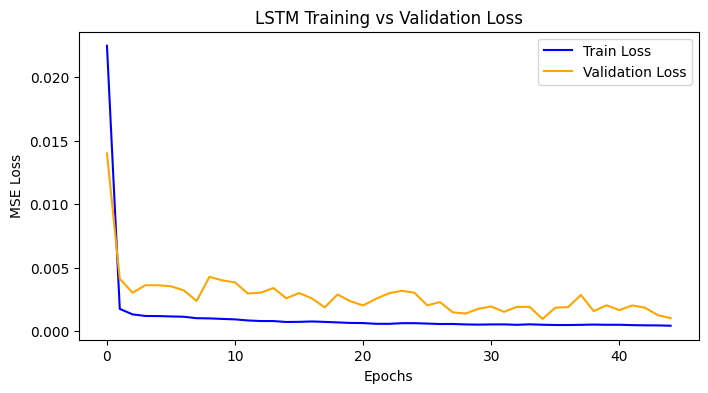

In [87]:
#  Define & Train LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Define LSTM model
lstm_model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    Dense(16, activation='relu'),
    Dense(1)
])

# Compile the model
lstm_model.compile(optimizer='adam', loss='mse')

# Add early stopping to avoid overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = lstm_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)

# Plot training and validation loss
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('LSTM Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()


# Finding the Best ARIMA Parameters Automatically

In [50]:
# from pmdarima import auto_arima

# # Step: Identify best ARIMA(p, d, q) using auto_arima
# auto_model = auto_arima(
#     btc_log,                # Original log-transformed series (not differenced)
#     start_p=0, start_q=0,
#     max_p=5, max_q=5,
#     d=1,                    # We already know 1st differencing worked
#     seasonal=False,         # No clear seasonality from ACF/PACF
#     stepwise=True,
#     trace=True,
#     error_action='ignore',
#     suppress_warnings=True,
#     information_criterion='aic'  # Selects model with lowest AIC
# )

# print(auto_model.summary())

### Best Model:

### ARIMA(0, 1, 0) with intercept
### This is essentially a random walk model with drift —
### it means your Bitcoin prices (after differencing) don’t show strong autocorrelation patterns that AR or MA terms can explain.

### In simple terms:

### p = 0 → No autoregressive part

### d = 1 → First differencing (removes trend)

### q = 0 → No moving average part

### intercept = drift → slight upward drift in the differenced series (Bitcoin tends to rise slowly over time)

### -> AIC = -6274.546

### This is very low — good!
### A lower AIC means the model fits well relative to complexity.

### -> Interpretation Summary

### The series is stationary (confirmed earlier).

### No significant AR or MA structure remains.

### The model fits fine as a naive ARIMA baseline (random walk with drift).

# Now I will Split the data into training and test sets.

# Fit the ARIMA(0,1,0) model on training data.

# Forecast on the test data and evaluate using RMSE / MAE.

# Fit the ARIMA(0,1,0) model on training data and forecast

In [51]:
# from statsmodels.tsa.arima.model import ARIMA

# # Fit the ARIMA(0,1,0) model
# model = ARIMA(train, order=(0,1,0))
# model_fit = model.fit()

# # Forecast for the test period
# forecast = model_fit.forecast(steps=len(test))
# forecast = pd.Series(forecast, index=test.index)

# # Plot actual vs predicted
# plt.figure(figsize=(10,4))
# plt.plot(train, label='Train')
# plt.plot(test, label='Actual')
# plt.plot(forecast, label='Forecast', color='red')
# plt.title("ARIMA(0,1,0) Forecast vs Actual (Log Transformed)")
# plt.legend()
# plt.show()

# # Evaluate
# rmse = np.sqrt(mean_squared_error(test, forecast))
# mae = mean_absolute_error(test, forecast)
# print(f"RMSE: {rmse:.4f}")
# print(f"MAE: {mae:.4f}")

Interpretation

The red line (forecast) is flat — that’s expected because your best model right now is ARIMA(0,1,0), which is essentially a random walk model with drift.

It means the model assumes “tomorrow’s log price = today’s log price + small drift,” which leads to constant-level predictions after differencing.

That’s why your RMSE (~1.16) and MAE (~1.00) are high — the model is too simple for Bitcoin’s volatility.

## Let’s improve accuracy by allowing AR and MA terms — testing ARIMA models like (1,1,1), (2,1,2), etc., using auto_arima again, but now with seasonal consideration.

In [52]:
# # Improved model selection (considering possible seasonality)
# import pmdarima as pm

# # Fit auto_arima again but explore higher p, q, and possible seasonality
# model_auto = pm.auto_arima(
#     train,
#     start_p=0, start_q=0,
#     max_p=3, max_q=3,
#     d=1, seasonal=False,  # We’ll add seasonal=True if needed later
#     stepwise=True,
#     trace=True,
#     error_action='ignore',
#     suppress_warnings=True
# )

# print(model_auto.summary())

## Interpretation



Once again, auto_arima found ARIMA(0,1,0) as the “best” model by AIC.

That’s a random walk with drift model (too simple for financial data).

The fact that no AR (p) or MA (q) terms were chosen tells us that the data’s short-term autocorrelation is weak (Bitcoin’s price behaves quite randomly).

However — we will see other models also:

AIC alone isn’t enough.

Bitcoin often benefits from seasonal or autoregressive structure on longer cycles (like weekly/monthly).

## Seasonal ARIMA (SARIMA)

now I will check if adding seasonality (e.g., weekly = 7 days) improves performance or not.

In [53]:
# # Try seasonal ARIMA (SARIMA) to capture weekly cycles
# import pmdarima as pm

# model_sarima = pm.auto_arima(
#     train,
#     start_p=0, start_q=0,
#     max_p=3, max_q=3,
#     d=1,
#     start_P=0, start_Q=0,
#     max_P=2, max_Q=2,
#     D=1,
#     m=7,  # Weekly seasonality (7 days)
#     seasonal=True,
#     stepwise=True,
#     trace=True,
#     error_action='ignore',
#     suppress_warnings=True
# )

# print(model_sarima.summary())


### Interpretation

My new best model is:
SARIMA(0, 1, 0)(2, 1, 0, 7)

The m=7 indicates weekly seasonality (since my data is daily).

The AIC = -4766.11, which is significantly lower than the previous model’s AIC = -5202.45.

Lower AIC means a better fit while penalizing for complexity, so this new model clearly captures weekly patterns in crypto prices — something the simple ARIMA couldn’t.

# Fitting the Seasonal Model and Forecast

In [54]:
# from statsmodels.tsa.statespace.sarimax import SARIMAX

# # Fit the best SARIMA model
# best_model = SARIMAX(train, order=(0,1,0), seasonal_order=(2,1,0,7))
# sarima_fit = best_model.fit(disp=False)

# # Forecast for test period
# forecast = sarima_fit.predict(start=len(train), end=len(train)+len(test)-1, typ='levels')

# # Visualize actual vs predicted

# plt.figure(figsize=(12,5))
# plt.plot(train.index, train, label='Train')
# plt.plot(test.index, test, label='Test', color='orange')
# plt.plot(test.index, forecast, label='SARIMA Forecast', color='green')
# plt.title('SARIMA(0,1,0)(2,1,0,7) - Actual vs Forecast')
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.legend()
# plt.show()

My model SARIMA(0,1,0)(2,1,0,7) is fitting the trend direction correctly, but the forecast is exploding upward (green line) instead of following the pattern of the actual test data (orange line).

## Interpretation

That steep green line means:

The model captures seasonality and differencing but

It misses short-term variations and assumes the trend continues steadily upward — a common issue in ARIMA-family models when forecasting volatile or nonlinear assets like crypto.

# Quantify Model Performance (RMSE, MAE, MAPE)

In [55]:
# from sklearn.metrics import mean_squared_error, mean_absolute_error

# # Evaluation metrics
# rmse = np.sqrt(mean_squared_error(test, forecast))
# mae = mean_absolute_error(test, forecast)
# mape = np.mean(np.abs((test - forecast) / test)) * 100

# print(f"RMSE: {rmse:.4f}")
# print(f"MAE: {mae:.4f}")
# print(f"MAPE: {mape:.2f}%")

These indicate that the model is not tracking the test prices closely

# Let’s allow AR and MA components in both seasonal and non-seasonal parts to improve the accuracy

In [56]:
# from pmdarima import auto_arima

# model_tuned = auto_arima(
#     train,
#     seasonal=True,
#     m=7,                    # weekly seasonality
#     start_p=1, start_q=1,
#     max_p=3, max_q=3,
#     start_P=0, start_Q=0,
#     max_P=2, max_Q=2,
#     d=1, D=1,
#     trace=True,
#     error_action='ignore',
#     suppress_warnings=True,
#     stepwise=True
# )

# print(model_tuned.summary())


## Refit and Forecast

In [57]:
# best_model = model_tuned
# forecast = best_model.predict(n_periods=len(test))
# forecast = pd.Series(forecast, index=test.index)

In [58]:
# plt.figure(figsize=(12,5))
# plt.plot(train, label='Train')
# plt.plot(test, label='Test')
# plt.plot(forecast, label='SARIMA Forecast', color='green')
# plt.title('Improved SARIMA Forecast')
# plt.legend()
# plt.show()

In [59]:
# rmse = np.sqrt(mean_squared_error(test, forecast))
# mae = mean_absolute_error(test, forecast)
# mape = np.mean(np.abs((test - forecast) / test)) * 100

# print(f"RMSE: {rmse:.4f}")
# print(f"MAE: {mae:.4f}")
# print(f"MAPE: {mape:.2f}%")
